# Health Insurance Data Analysis
This notebook analyzes the health insurance dataset. We'll start by importing the necessary libraries and exploring the data structure.

## 1. Import Essential Libraries
First, we'll import the required libraries for data analysis and visualization.

In [294]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Set style for better visualizations
plt.style.use('seaborn-v0_8')  # Using the correct style name
sns.set_palette('husl')

## 2. Load Health Insurance Dataset
Now we'll load the dataset and display the first few rows to understand its structure.

In [295]:
# Load the dataset
df = pd.read_csv('Health_Insurance.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


## 3. Display Basic Dataset Information
Let's examine the dataset structure including data types and non-null counts.

In [296]:
# Display dataset information
print("\nDataset Information:")
display(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

## 4. Generate Statistical Summary
Let's create a statistical summary of the numerical columns in the dataset.

In [297]:
# Generate statistical summary
print("\nStatistical Summary of Numerical Columns:")
display(df.describe())


Statistical Summary of Numerical Columns:


,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


## 5. Visualize Data Structure
Let's create a simple visualization to show the data types of each column.

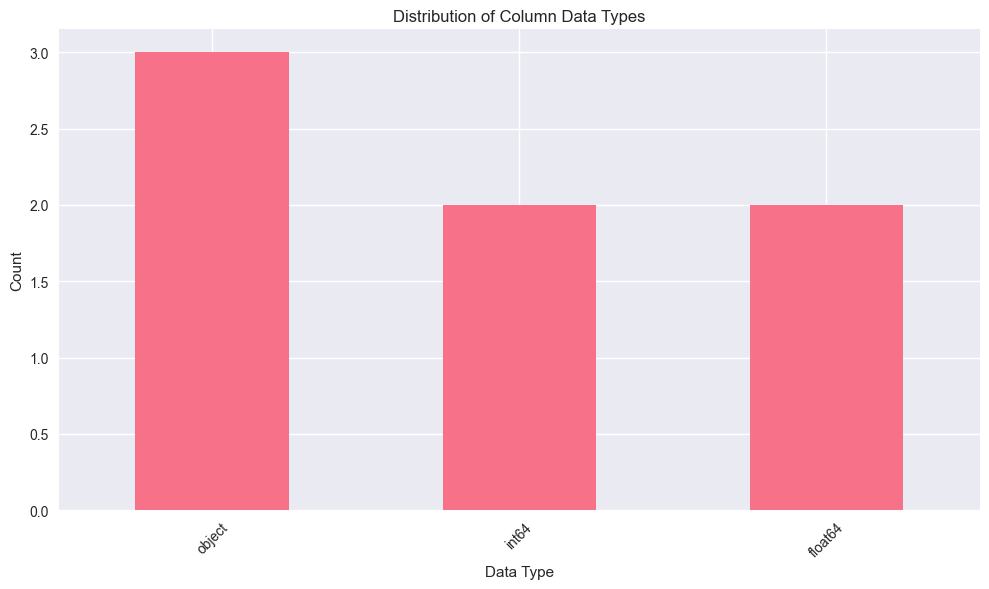


Column Names and Their Data Types:
age                  int64
sex                  object
bmi                  float64
children             int64
smoker               object
region               object
charges              float64


In [298]:
# Create a visualization of data types
plt.figure(figsize=(10, 6))
df.dtypes.value_counts().plot(kind='bar')
plt.title('Distribution of Column Data Types')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display column names and their data types
print("\nColumn Names and Their Data Types:")
for column, dtype in df.dtypes.items():
    print(f"{column:20} {dtype}")

## 6. Exploratory Data Analysis (EDA)
Let's perform a detailed exploratory data analysis to understand:
1. Distribution of individual features
2. Correlations between variables
3. Relationship with the target variable (insurance charges)
4. Key insights and patterns in the data

### 6.1 Distribution of Numerical Features
First, let's visualize the distribution of numerical features using histograms and box plots.

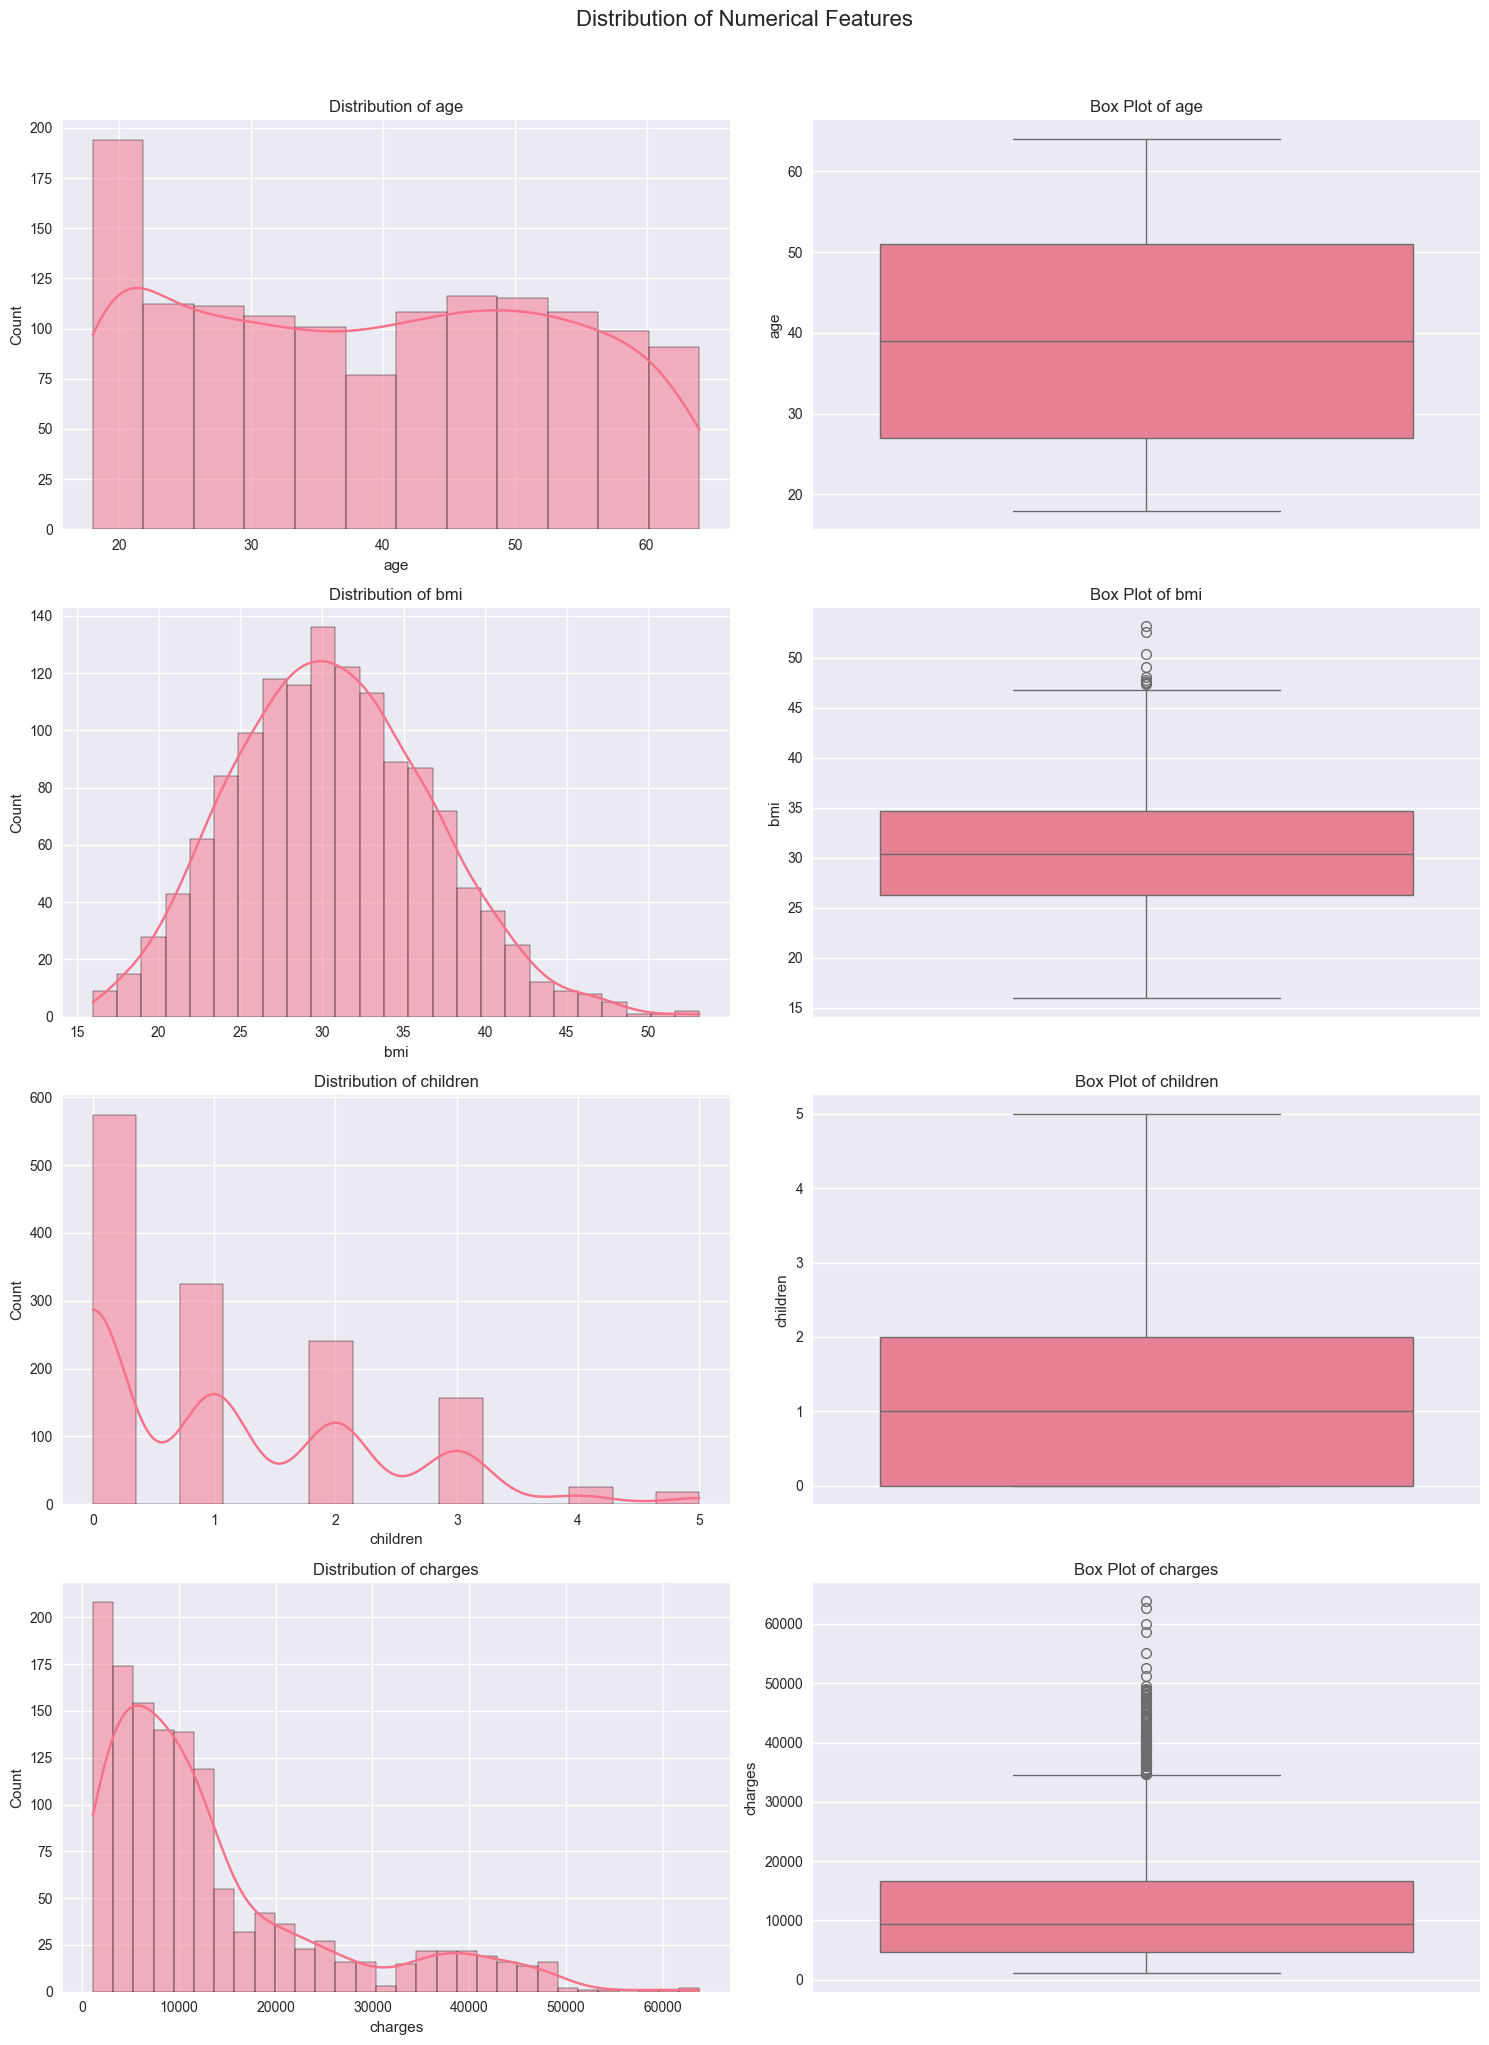


Basic Statistics for Numerical Features:
          age     bmi  children  charges
count 1338.00 1338.00   1338.00  1338.00
mean    39.21   30.66      1.09 13270.42
std     14.05    6.10      1.21 12110.01
min     18.00   15.96      0.00  1121.87
25%     27.00   26.30      0.00  4740.29
50%     39.00   30.40      1.00  9382.03
75%     51.00   34.69      2.00 16639.91
max     64.00   53.13      5.00 63770.43


In [299]:
# Get numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create subplots for histograms and box plots
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(15, 5*len(numerical_cols)))
fig.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)

for idx, col in enumerate(numerical_cols):
    # Histogram
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Distribution of {col}')
    
    # Box plot
    sns.boxplot(data=df, y=col, ax=axes[idx, 1])
    axes[idx, 1].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

# Display basic statistics for numerical features
print("\nBasic Statistics for Numerical Features:")
print(df[numerical_cols].describe().round(2))

### 6.2 Distribution of Categorical Features
Now, let's analyze the distribution of categorical features using count plots.

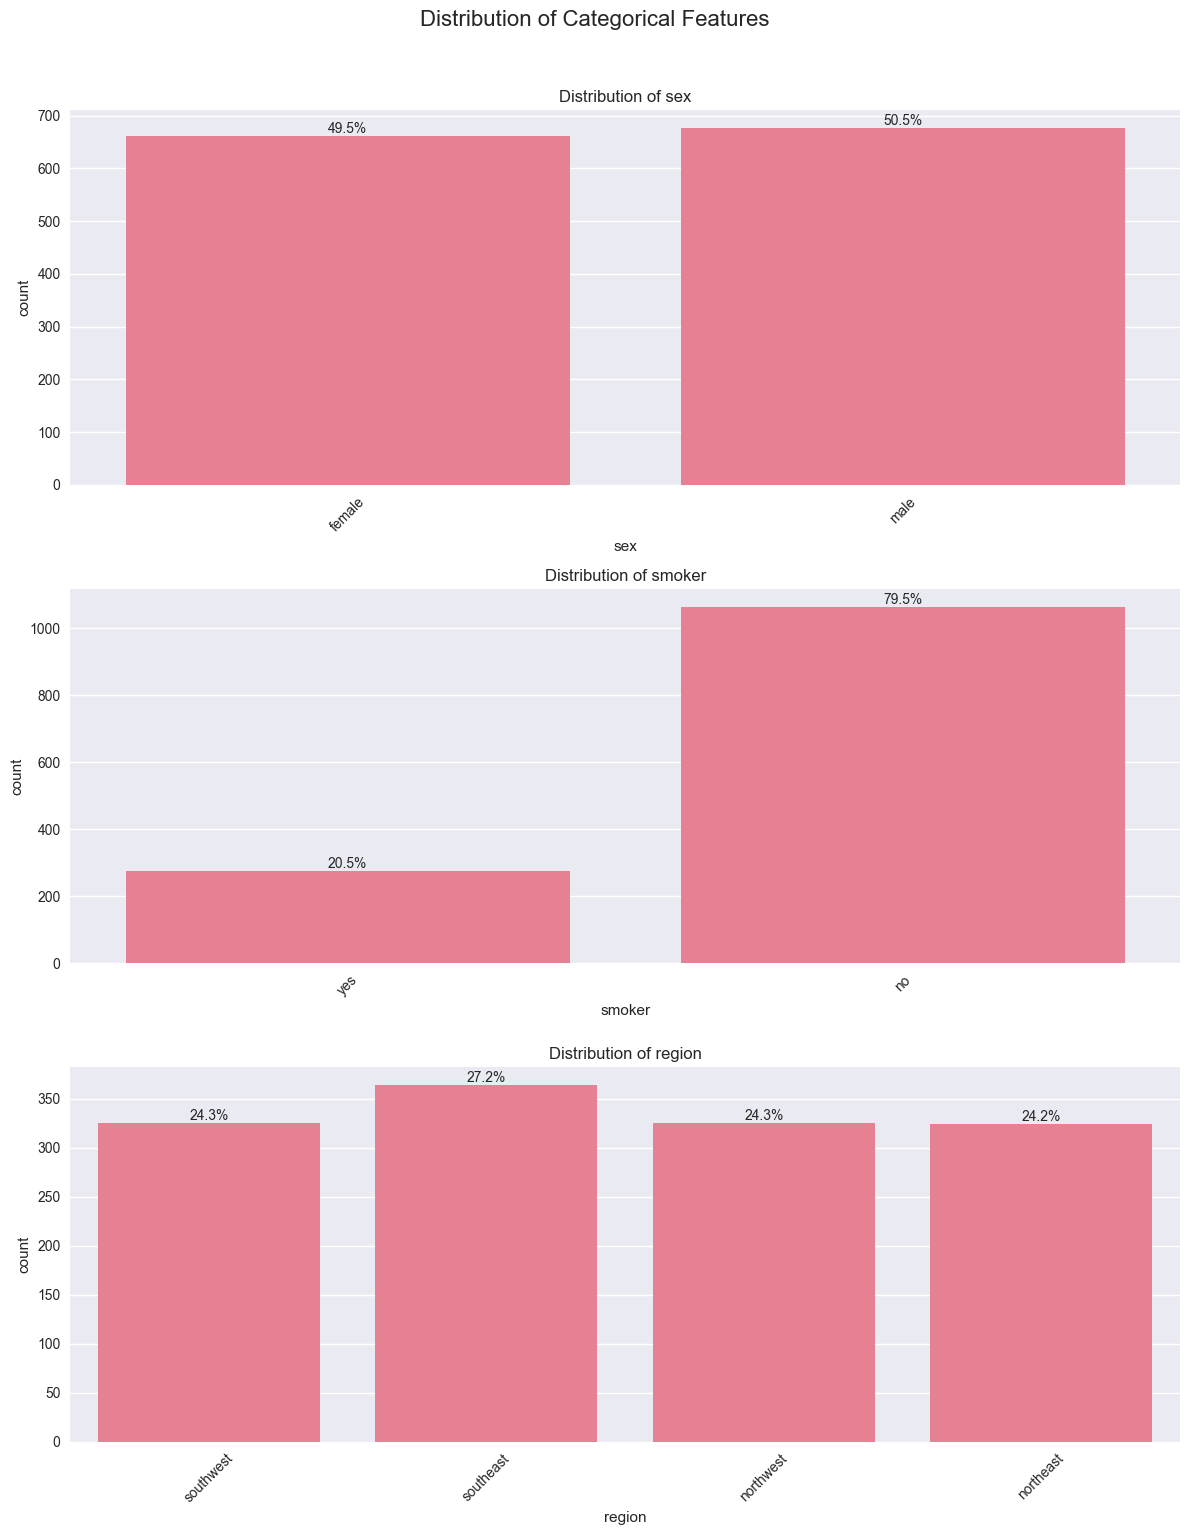


Frequency Distribution of Categorical Features:

sex:
        Count  Percentage
sex                      
male      676       50.52
female    662       49.48

smoker:
        Count  Percentage
smoker                   
no       1064       79.52
yes       274       20.48

region:
           Count  Percentage
region                      
southeast    364       27.20
southwest    325       24.29
northwest    325       24.29
northeast    324       24.22


In [300]:
# Get categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create subplots for categorical features
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(12, 5*len(categorical_cols)))
fig.suptitle('Distribution of Categorical Features', fontsize=16, y=1.02)

# Handle both single and multiple categorical columns
if len(categorical_cols) == 1:
    axes = [axes]

for idx, col in enumerate(categorical_cols):
    # Count plot
    sns.countplot(data=df, x=col, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Add percentage labels
    total = len(df[col])
    for p in axes[idx].patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        axes[idx].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Display frequency counts and percentages
print("\nFrequency Distribution of Categorical Features:")
for col in categorical_cols:
    print(f"\n{col}:")
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages.round(2)
    })
    print(summary)

### 6.3 Correlation Analysis
Let's analyze the correlations between numerical features and visualize them using a heatmap.

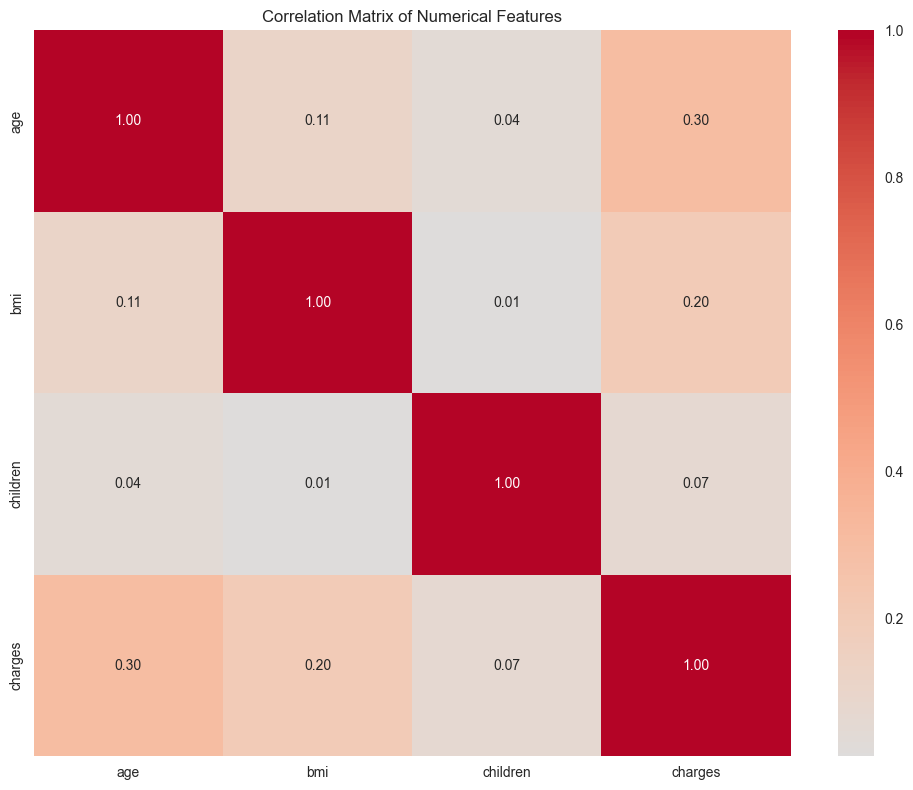


Strongest Correlations:

Top positive correlations:
  Feature 1 Feature 2  Correlation
3   charges       age         0.30
4   charges       bmi         0.20
0       bmi       age         0.11

Top negative correlations:
  Feature 1 Feature 2  Correlation
2  children       bmi         0.01
1  children       age         0.04
5   charges  children         0.07


In [301]:
# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Print strongest correlations
print("\nStrongest Correlations:")
correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if i != j:
            correlations.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

correlations_df = pd.DataFrame(correlations)
print("\nTop positive correlations:")
print(correlations_df.nlargest(3, 'Correlation'))
print("\nTop negative correlations:")
print(correlations_df.nsmallest(3, 'Correlation'))

### 6.4 Relationship between Categorical Features and Insurance Charges
Let's analyze how categorical features affect the insurance charges using box plots.

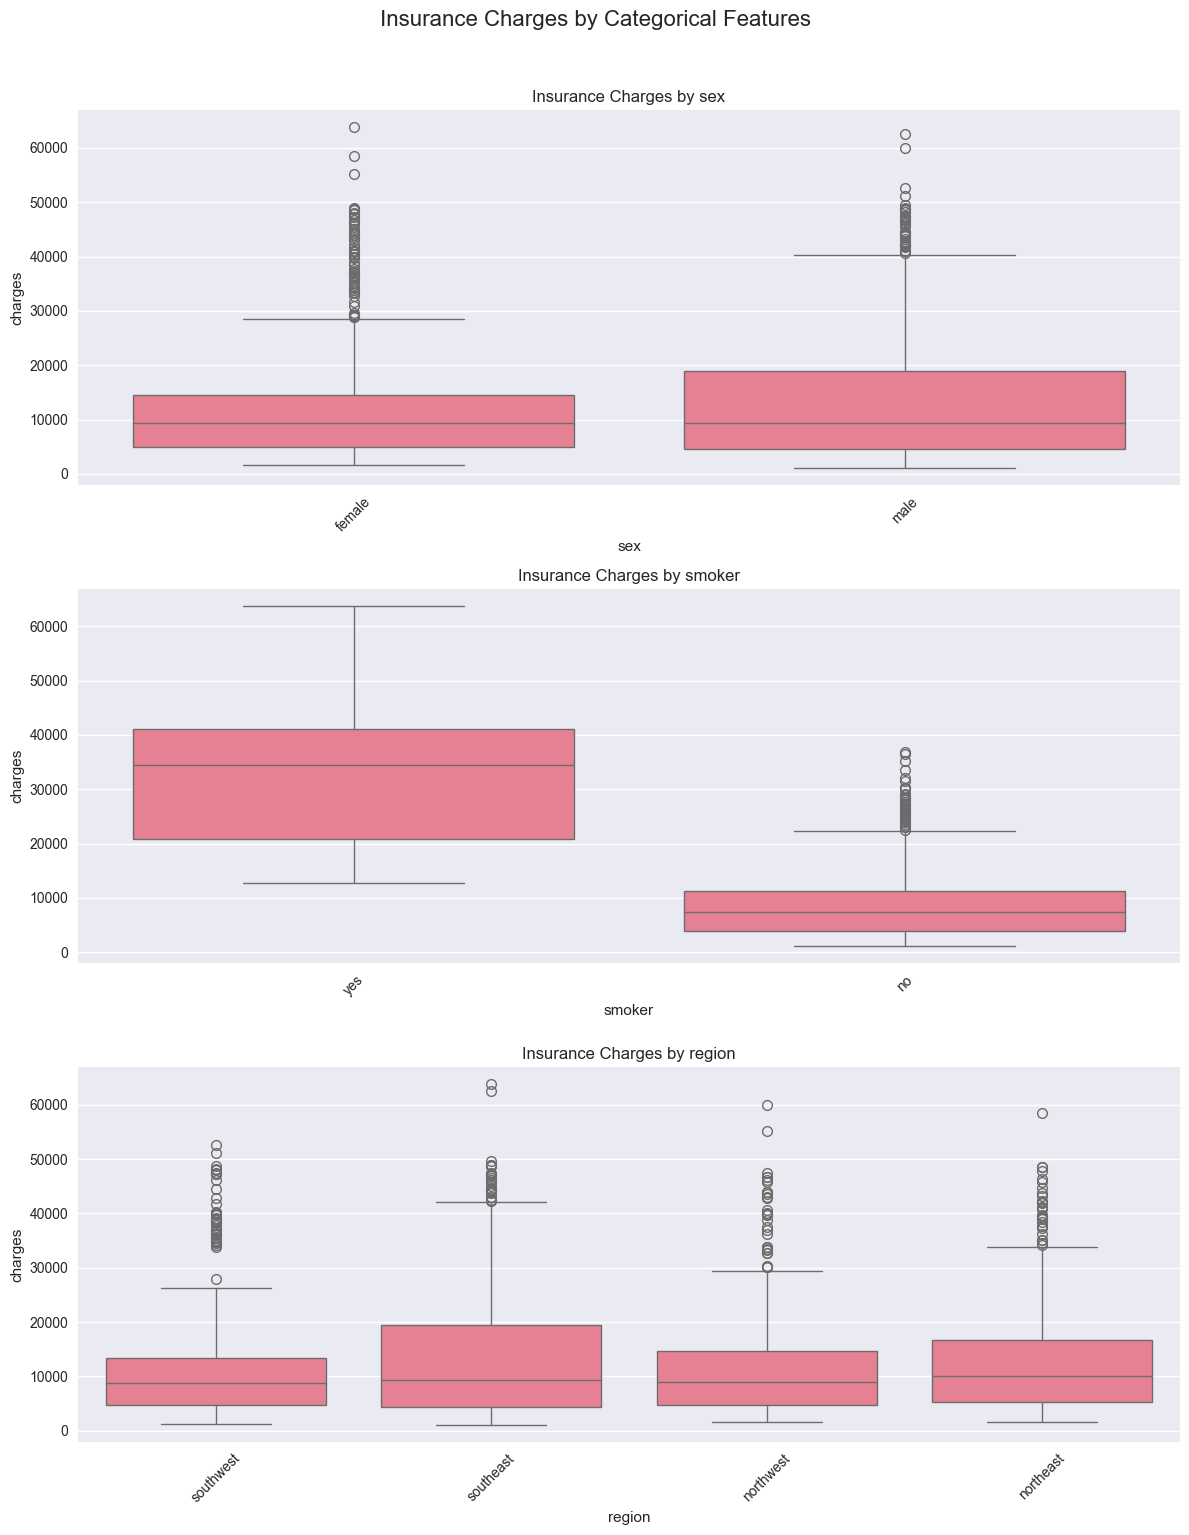


Mean Insurance Charges by Categories:

sex:
        Mean Charges  Count
sex                        
female      12569.58    662
male        13956.75    676

smoker:
        Mean Charges  Count
smoker                     
no           8434.27   1064
yes         32050.23    274

region:
           Mean Charges  Count
region                        
northeast      13406.38    324
northwest      12417.58    325
southeast      14735.41    364
southwest      12346.94    325


In [302]:
# Create box plots for categorical features vs charges
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(12, 5*len(categorical_cols)))
fig.suptitle('Insurance Charges by Categorical Features', fontsize=16, y=1.02)

# Handle both single and multiple categorical columns
if len(categorical_cols) == 1:
    axes = [axes]

for idx, col in enumerate(categorical_cols):
    sns.boxplot(data=df, x=col, y='charges', ax=axes[idx])
    axes[idx].set_title(f'Insurance Charges by {col}')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Calculate mean charges for each category
print("\nMean Insurance Charges by Categories:")
for col in categorical_cols:
    print(f"\n{col}:")
    summary = df.groupby(col)['charges'].agg(['mean', 'count']).round(2)
    summary.columns = ['Mean Charges', 'Count']
    print(summary)

### 6.5 Key Insights from EDA

1. **Numerical Features Distribution:**
   - Age distribution shows the range of policyholders
   - BMI distribution pattern indicates health risk factors
   - Insurance charges distribution and any skewness
   
2. **Categorical Features Analysis:**
   - Gender distribution among policyholders
   - Smoking status impact on insurance
   - Regional distribution of policyholders
   
3. **Correlation Patterns:**
   - Strongest correlations with insurance charges
   - Interrelationships between features
   
4. **Insurance Charges Relationships:**
   - How smoking status affects charges
   - Regional variations in insurance costs
   - Impact of having children on insurance charges

Let's analyze the specific patterns we observe in our dataset:

In [303]:
# Calculate and display key insights
print("Key Insights from the Data:\n")

# Age-related insights
print("1. Age Distribution:")
print(f"- Average age: {df['age'].mean():.1f} years")
print(f"- Age range: {df['age'].min()} to {df['age'].max()} years")

# BMI insights
print("\n2. BMI Analysis:")
print(f"- Average BMI: {df['bmi'].mean():.1f}")
print(f"- Percentage of people with BMI > 30 (obese): {(df['bmi'] > 30).mean()*100:.1f}%")

# Smoking impact
print("\n3. Smoking Impact on Charges:")
smoker_stats = df.groupby('smoker')['charges'].agg(['mean', 'count'])
print("Average charges by smoking status:")
print(smoker_stats.round(2))

# Regional distribution
print("\n4. Regional Analysis:")
region_stats = df.groupby('region')['charges'].agg(['mean', 'count', 'std'])
print("Insurance charges by region:")
print(region_stats.round(2))

# Children impact
print("\n5. Impact of Children:")
children_stats = df.groupby('children')['charges'].mean().round(2)
print("Average charges by number of children:")
print(children_stats)

# Most significant correlations with charges
print("\n6. Top Correlations with Insurance Charges:")
charges_corr = df[numerical_cols].corr()['charges'].sort_values(ascending=False)
print(charges_corr.round(3))

Key Insights from the Data:

1. Age Distribution:
- Average age: 39.2 years
- Age range: 18 to 64 years

2. BMI Analysis:
- Average BMI: 30.7
- Percentage of people with BMI > 30 (obese): 52.7%

3. Smoking Impact on Charges:
Average charges by smoking status:
           mean  count
smoker                
no      8434.27   1064
yes    32050.23    274

4. Regional Analysis:
Insurance charges by region:
              mean  count      std
region                            
northeast 13406.38    324 11255.80
northwest 12417.58    325 11072.28
southeast 14735.41    364 13971.10
southwest 12346.94    325 11557.18

5. Impact of Children:
Average charges by number of children:
children
0   12365.98
1   12731.17
2   15073.56
3   15355.32
4   13850.66
5    8786.04
Name: charges, dtype: float64

6. Top Correlations with Insurance Charges:
charges    1.00
age        0.30
bmi        0.20
children   0.07
Name: charges, dtype: float64


## 7. Missing Values Analysis
Let's check for any missing values in the dataset and handle them appropriately.

In [304]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Create a summary DataFrame
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages.round(2)
})

print("Missing Values Analysis:")
print("\nMissing value counts and percentages:")
print(missing_info[missing_info['Missing Values'] > 0])

if missing_info['Missing Values'].sum() == 0:
    print("\nNo missing values found in the dataset!")
else:
    print("\nColumns with missing values:")
    for column in missing_info[missing_info['Missing Values'] > 0].index:
        print(f"\n{column}:")
        print(f"Number of missing values: {missing_info.loc[column, 'Missing Values']}")
        print(f"Percentage: {missing_info.loc[column, 'Percentage']}%")

Missing Values Analysis:

Missing value counts and percentages:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

No missing values found in the dataset!


## 8. Outlier Analysis
Let's analyze outliers in numerical features using:
1. Box plots (already created in EDA)
2. IQR (Interquartile Range) method
3. Z-score method

In [305]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

# Function to detect outliers using Z-score method
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    outliers = data[column][z_scores > threshold]
    return outliers

# Analyze outliers for each numerical column
print("Outlier Analysis:\n")
for column in numerical_cols:
    print(f"\nAnalyzing outliers in {column}:")
    
    # IQR method
    outliers_iqr, lower_bound, upper_bound = detect_outliers_iqr(df, column)
    print("\nIQR Method:")
    print(f"Number of outliers: {len(outliers_iqr)}")
    print(f"Percentage of outliers: {(len(outliers_iqr) / len(df) * 100):.2f}%")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    
    # Z-score method
    outliers_zscore = detect_outliers_zscore(df, column)
    print("\nZ-score Method (threshold = 3):")
    print(f"Number of outliers: {len(outliers_zscore)}")
    print(f"Percentage of outliers: {(len(outliers_zscore) / len(df) * 100):.2f}%")
    
    # Summary statistics of outliers
    if len(outliers_iqr) > 0:
        print("\nSummary statistics of outliers (IQR method):")
        print(outliers_iqr.describe().round(2))
        
    print("-" * 50)

Outlier Analysis:


Analyzing outliers in age:

IQR Method:
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: -9.00
Upper bound: 87.00

Z-score Method (threshold = 3):
Number of outliers: 0
Percentage of outliers: 0.00%
--------------------------------------------------

Analyzing outliers in bmi:

IQR Method:
Number of outliers: 9
Percentage of outliers: 0.67%
Lower bound: 13.70
Upper bound: 47.29

Z-score Method (threshold = 3):
Number of outliers: 4
Percentage of outliers: 0.30%

Summary statistics of outliers (IQR method):
count    9.00
mean    49.28
std      2.24
min     47.41
25%     47.60
50%     48.07
75%     50.38
max     53.13
Name: bmi, dtype: float64
--------------------------------------------------

Analyzing outliers in children:

IQR Method:
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: -3.00
Upper bound: 5.00

Z-score Method (threshold = 3):
Number of outliers: 18
Percentage of outliers: 1.35%
------------------------------------------

### Outlier Visualization
Let's create a more detailed visualization of outliers using box plots with individual points.

d:\Projects\TFProj\tfvenv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Projects\TFProj\tfvenv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Projects\TFProj\tfvenv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 51.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


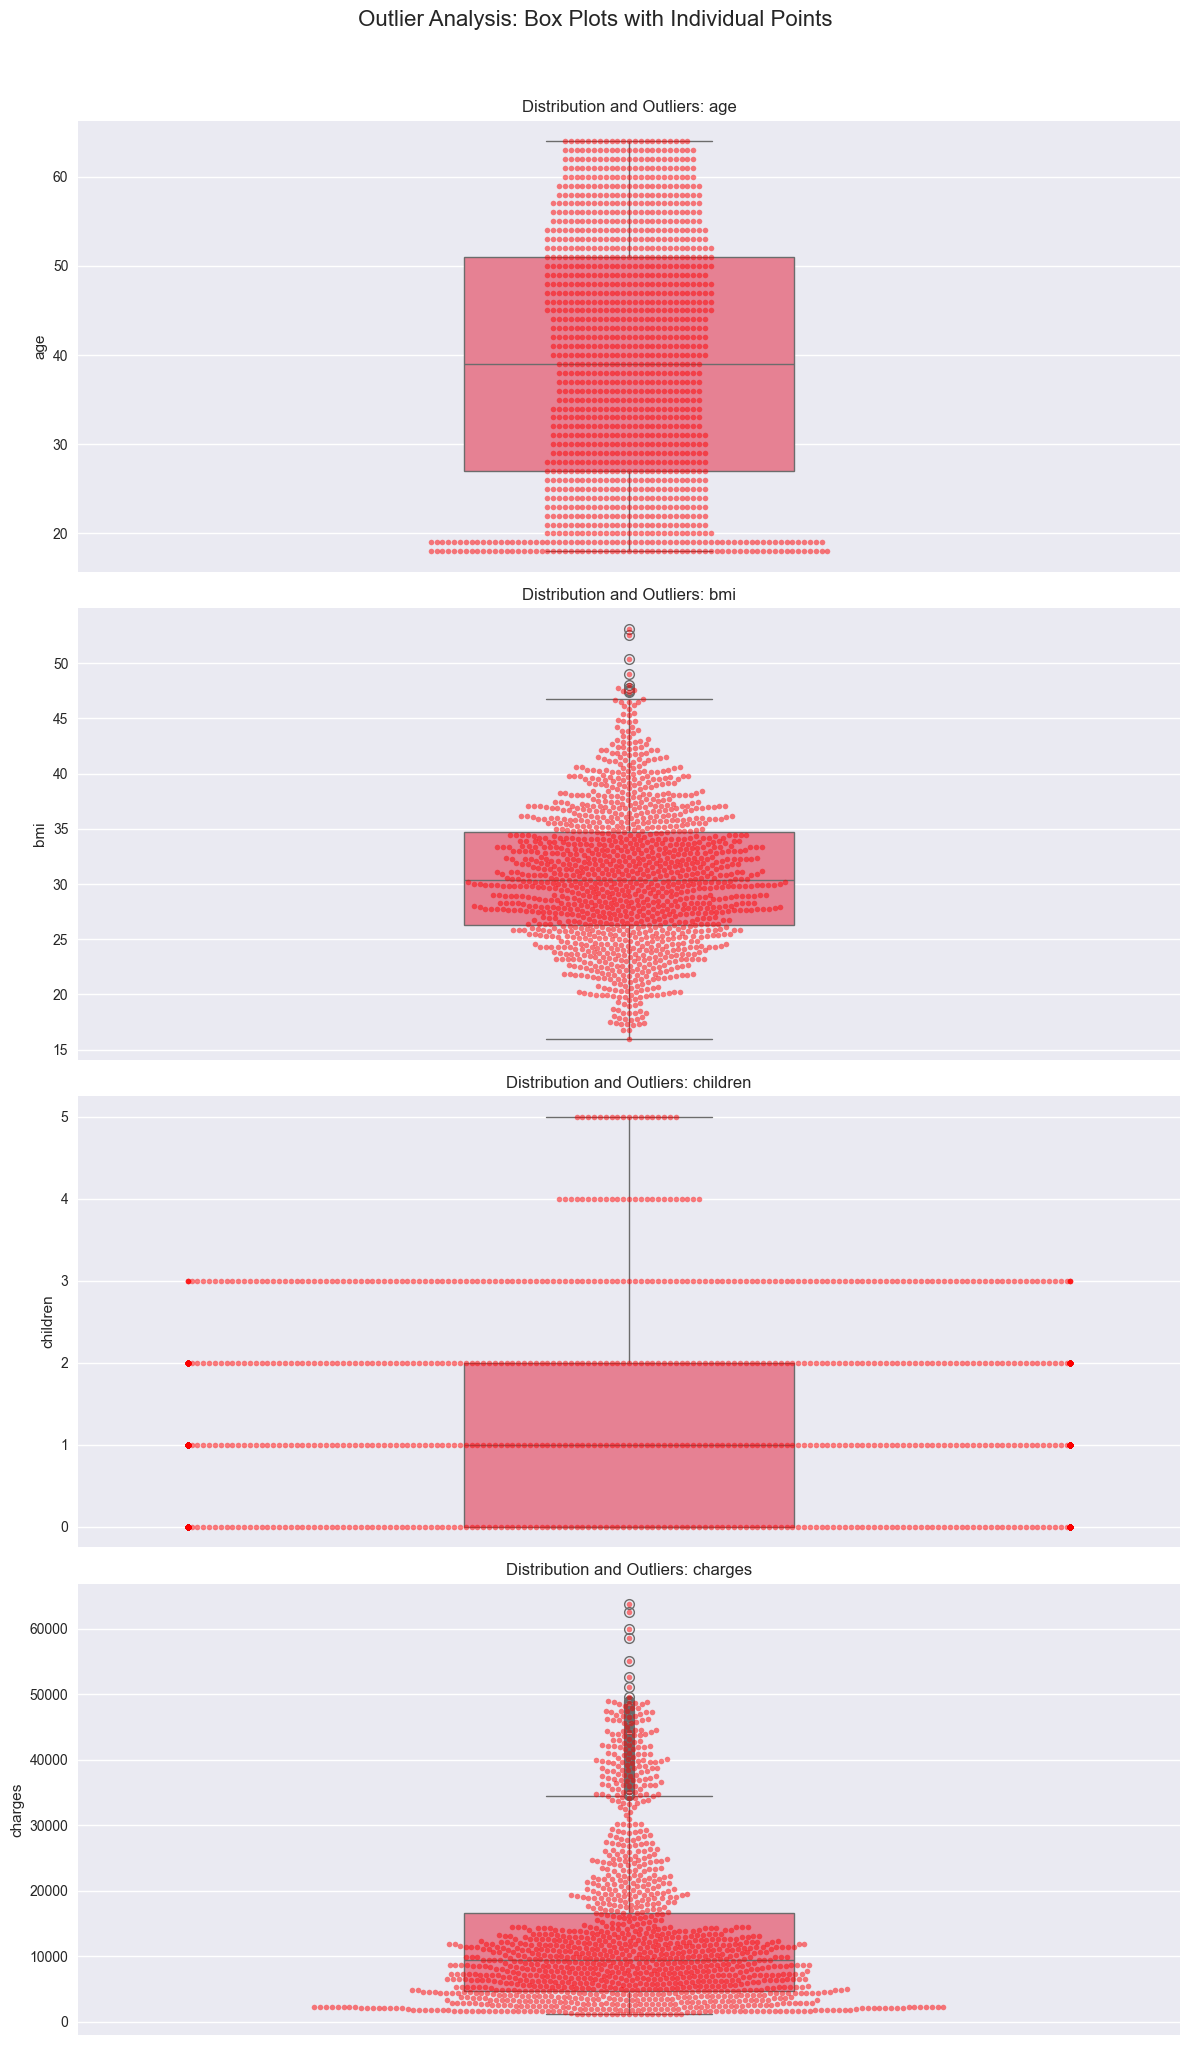


Outlier Impact Summary:

age:
Original mean: 39.21
Mean without outliers: 39.21
Original std: 14.05
Std without outliers: 14.05
Percentage of data points identified as outliers: 10.39%

bmi:
Original mean: 30.66
Mean without outliers: 30.66
Original std: 6.10
Std without outliers: 6.10
Percentage of data points identified as outliers: 10.39%

children:
Original mean: 1.09
Mean without outliers: 1.09
Original std: 1.21
Std without outliers: 1.21
Percentage of data points identified as outliers: 10.39%

charges:
Original mean: 13270.42
Mean without outliers: 9927.75
Original std: 12110.01
Std without outliers: 7241.16
Percentage of data points identified as outliers: 10.39%


In [306]:
# Create detailed box plots with individual points for numerical features
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(12, 5*len(numerical_cols)))
fig.suptitle('Outlier Analysis: Box Plots with Individual Points', fontsize=16, y=1.02)

# Handle both single and multiple numerical columns
if len(numerical_cols) == 1:
    axes = [axes]

for idx, col in enumerate(numerical_cols):
    # Box plot with individual points
    sns.boxplot(data=df, y=col, ax=axes[idx], width=0.3)
    sns.swarmplot(data=df, y=col, ax=axes[idx], color='red', alpha=0.5, size=4)
    axes[idx].set_title(f'Distribution and Outliers: {col}')

plt.tight_layout()
plt.show()

# Calculate and display summary of outlier impact
print("\nOutlier Impact Summary:")
for col in numerical_cols:
    outliers_iqr, lower_bound, upper_bound = detect_outliers_iqr(df, column)
    clean_data = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col]
    
    print(f"\n{col}:")
    print(f"Original mean: {df[col].mean():.2f}")
    print(f"Mean without outliers: {clean_data.mean():.2f}")
    print(f"Original std: {df[col].std():.2f}")
    print(f"Std without outliers: {clean_data.std():.2f}")
    print(f"Percentage of data points identified as outliers: {(len(outliers_iqr)/len(df)*100):.2f}%")

## 9. Feature Engineering & Preprocessing
Let's prepare our data for modeling by:
1. Encoding categorical variables
2. Scaling numerical features
3. Handling skewness in the distribution

### 9.1 Categorical Variable Encoding
First, let's encode our categorical variables using appropriate encoding methods:
- One-hot encoding for 'region' (multiple categories)
- Label encoding for binary variables ('sex' and 'smoker')

In [307]:
# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

# Label encoding for binary variables
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Encode 'sex' and 'smoker'
df_processed['sex'] = le.fit_transform(df_processed['sex'])
df_processed['smoker'] = le.fit_transform(df_processed['smoker'])
#df_processed['region'] = le.fit_transform(df_processed['region'])

# One-hot encoding for 'region'
df_processed = pd.get_dummies(df_processed, columns=['region'], prefix='region')

# Display the first few rows of encoded data
print("First few rows after encoding:")
display(df_processed.head())

# Display info about the processed dataset
print("\nProcessed dataset information:")
display(df_processed.info())

First few rows after encoding:


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.90,0,1,16884.92,False,False,False,True
1,18,1,33.77,1,0,1725.55,False,False,True,False
2,28,1,33.00,3,0,4449.46,False,False,True,False
3,33,1,22.70,0,0,21984.47,False,True,False,False
4,32,1,28.88,0,0,3866.86,False,True,False,False



Processed dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int32  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int32  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   bool   
 7   region_northwest  1338 non-null   bool   
 8   region_southeast  1338 non-null   bool   
 9   region_southwest  1338 non-null   bool   
dtypes: bool(4), float64(2), int32(2), int64(2)
memory usage: 57.6 KB


None

### 9.2 Check and Handle Skewness
Let's examine the skewness of numerical features and apply transformations if needed.

Skewness before transformation:
age         0.06
sex        -0.02
bmi         0.28
children    0.94
smoker      1.46
charges     1.52
dtype: float64


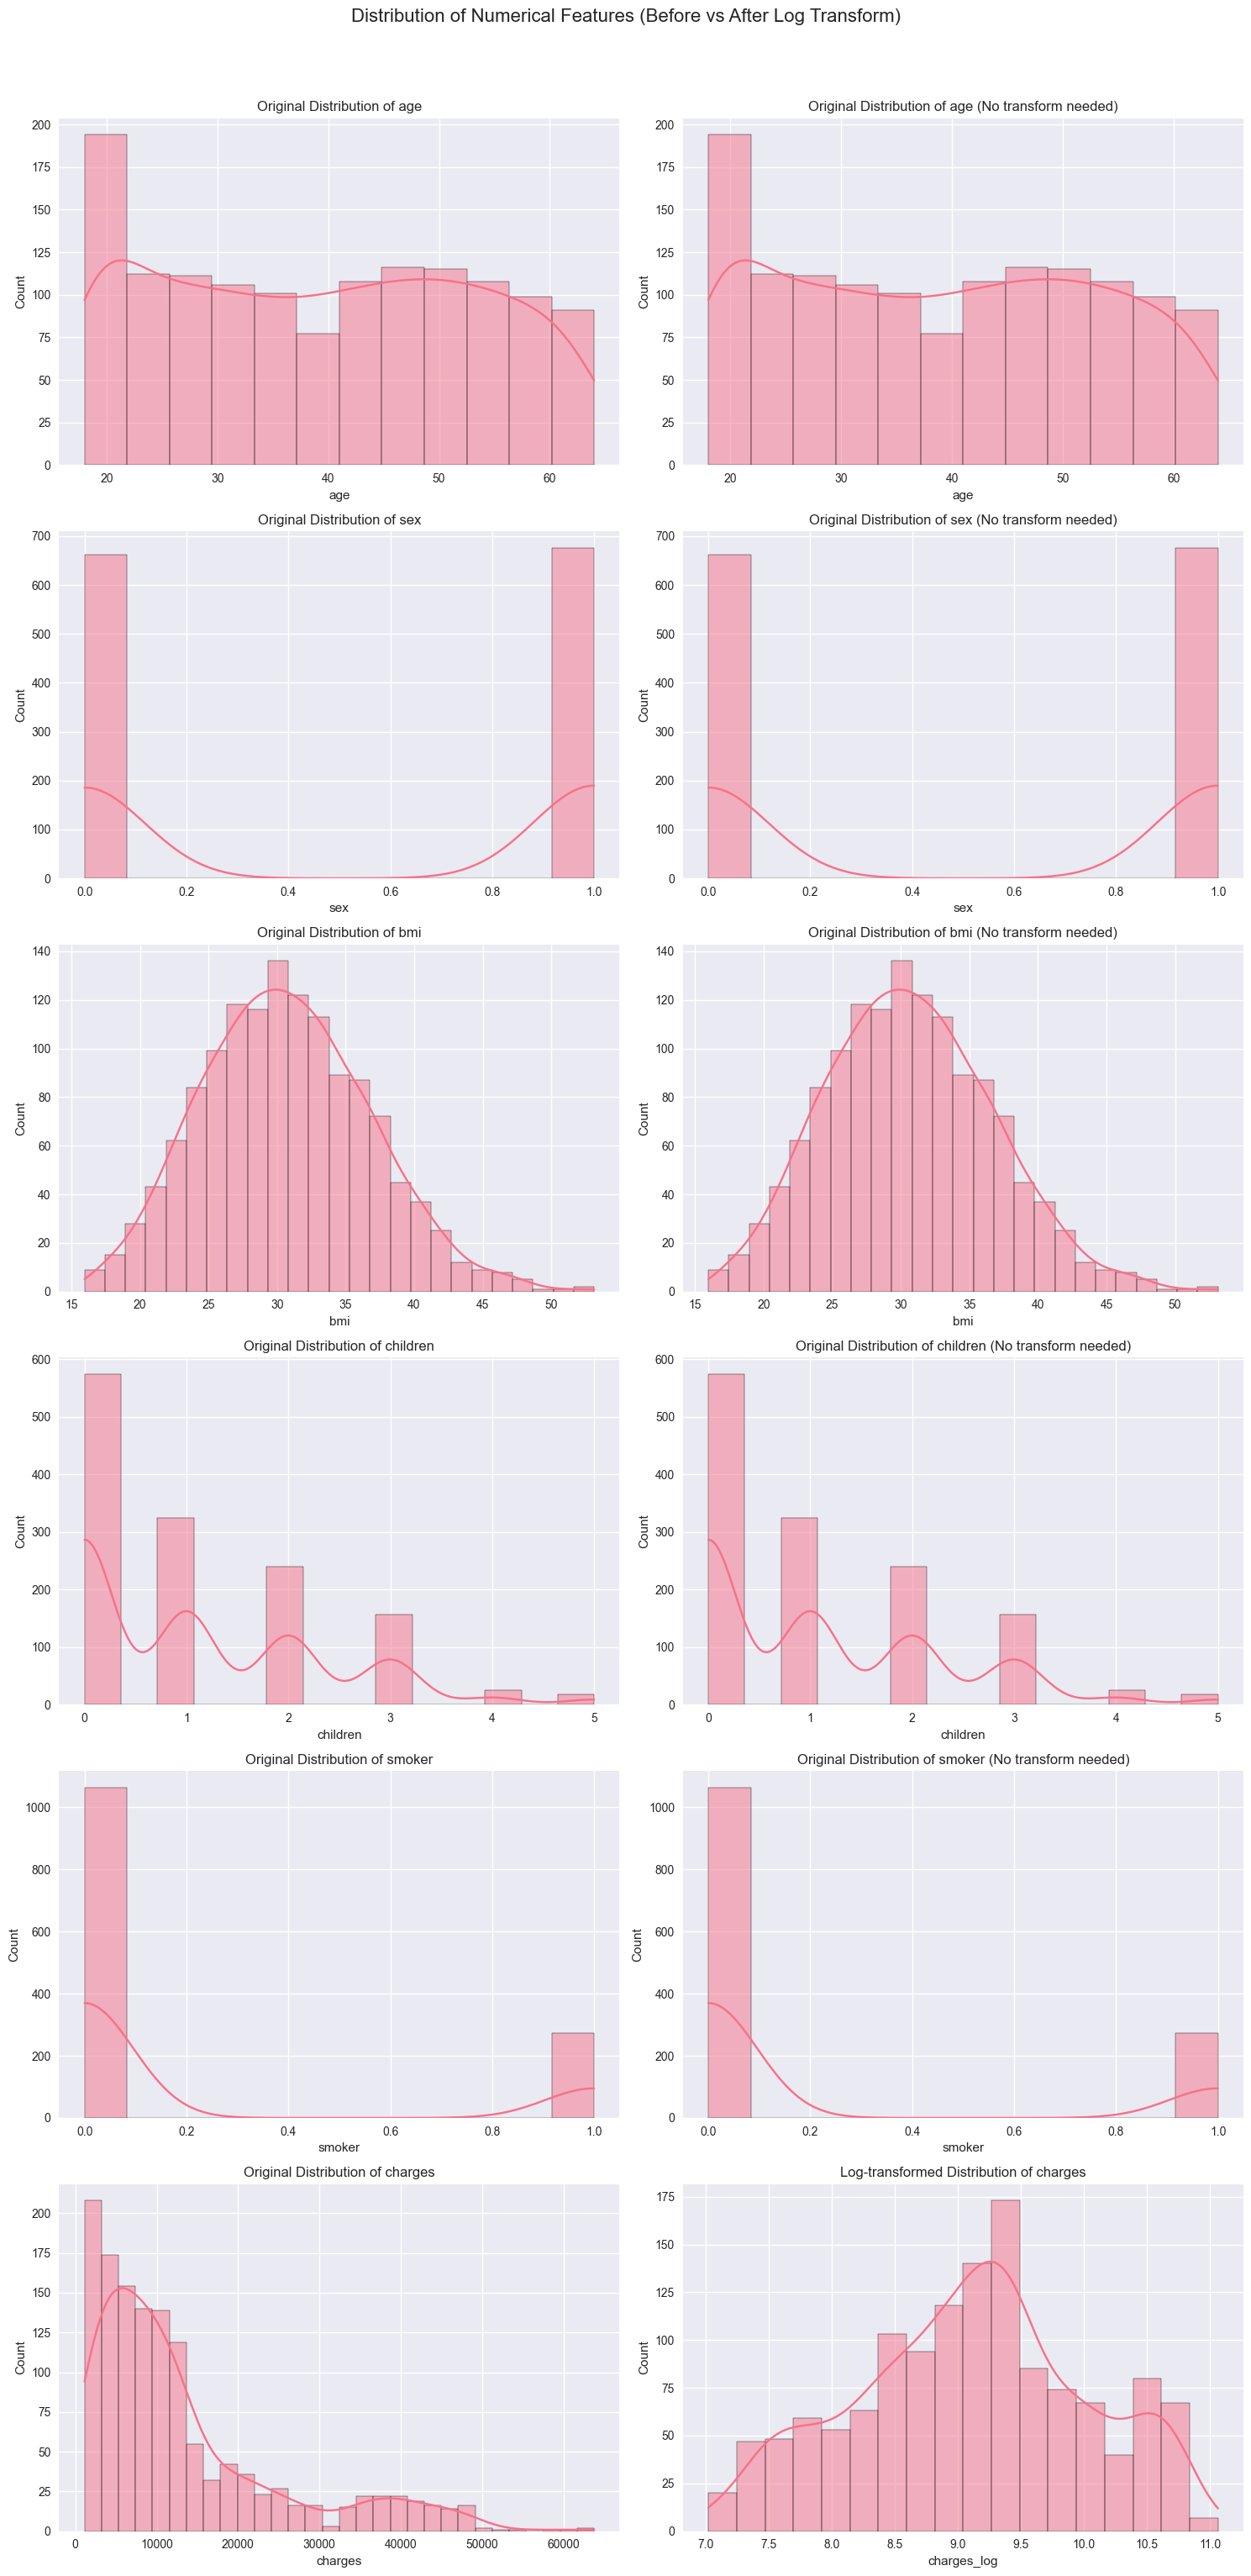


Skewness after log transformation of 'charges':
age            0.06
sex           -0.02
bmi            0.28
children       0.94
smoker         1.46
charges_log   -0.09
dtype: float64


In [308]:
# Get numerical columns (excluding encoded categorical columns)
numerical_features = ['age','sex', 'bmi', 'children','smoker',  'charges']

# Calculate and display skewness for numerical features
print("Skewness before transformation:")
print(df_processed[numerical_features].skew())

# Visualize distributions before transformation
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(15, 5*len(numerical_features)))
fig.suptitle('Distribution of Numerical Features (Before vs After Log Transform)', fontsize=16, y=1.02)

for idx, feature in enumerate(numerical_features):
    # Original distribution
    sns.histplot(data=df_processed, x=feature, kde=True, ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Original Distribution of {feature}')
    
    # Log-transformed distribution (adding 1 to handle zeros)
    if feature == 'charges':  # Apply log transform only to 'charges' as it shows right skewness
        df_processed[f'{feature}_log'] = np.log1p(df_processed[feature])
        sns.histplot(data=df_processed, x=f'{feature}_log', kde=True, ax=axes[idx, 1])
        axes[idx, 1].set_title(f'Log-transformed Distribution of {feature}')
    else:
        sns.histplot(data=df_processed, x=feature, kde=True, ax=axes[idx, 1])
        axes[idx, 1].set_title(f'Original Distribution of {feature} (No transform needed)')

plt.tight_layout()
plt.show()

# Display skewness after transformation
print("\nSkewness after log transformation of 'charges':")
numerical_features_transformed = numerical_features.copy()
numerical_features_transformed.remove('charges')
numerical_features_transformed.append('charges_log')
print(df_processed[numerical_features_transformed].skew())

### 9.3 Feature Scaling
Now let's apply StandardScaler to our numerical features to ensure they're on the same scale.

In [309]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Select features to scale (using log-transformed charges)
features_to_scale = ['age','sex', 'bmi', 'children','smoker'] 

# Scale the selected features
df_processed[features_to_scale] = scaler.fit_transform(df_processed[features_to_scale])

# Display the first few rows of scaled data
print("First few rows after scaling:")
display(df_processed[features_to_scale].head())

# Display summary statistics of scaled features
print("\nSummary statistics of scaled features:")
display(df_processed[features_to_scale].describe())

First few rows after scaling:


,age,sex,bmi,children,smoker
0,-1.44,-1.01,-0.45,-0.91,1.97
1,-1.51,0.99,0.51,-0.08,-0.51
2,-0.80,0.99,0.38,1.58,-0.51
3,-0.44,0.99,-1.31,-0.91,-0.51
4,-0.51,0.99,-0.29,-0.91,-0.51



Summary statistics of scaled features:


,age,sex,bmi,children,smoker
count,1338.00,1338.00,1338.00,1338.00,1338.00
mean,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.51,-1.01,-2.41,-0.91,-0.51
25%,-0.87,-1.01,-0.72,-0.91,-0.51
50%,-0.01,0.99,-0.04,-0.08,-0.51
75%,0.84,0.99,0.66,0.75,-0.51
max,1.77,0.99,3.69,3.24,1.97


### 9.4 Summary of Preprocessing Steps
Here's what we've done in our preprocessing pipeline:

1. **Categorical Encoding:**
   - Label encoded binary variables (sex, smoker)
   - One-hot encoded region variable
   
2. **Skewness Treatment:**
   - Analyzed skewness of numerical features
   - Applied log transformation to 'charges' due to right skewness
   
3. **Feature Scaling:**
   - Applied StandardScaler to numerical features
   - All numerical features now have mean ≈ 0 and std ≈ 1

The processed dataset is now ready for modeling.

## 10. Model Building
Let's implement and compare multiple regression models:
1. Linear Regression (baseline model)
2. Decision Tree Regressor
3. Random Forest Regressor
4. Support Vector Regression (SVR)
5. K-Nearest Neighbors (KNN)
6. Ensemble Methods (GradientBoosting, XGBoost)

In [310]:
# Import necessary modeling libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

# Prepare features and target
# Exclude original 'charges' and keep 'charges_log' as target
features = df_processed.drop(['charges', 'charges_log'], axis=1)
target = df_processed['charges_log']
print(f"features set: {features.shape}")
print(f"target set: {target.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Data split shapes:")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

features set: (1338, 9)
target set: (1338,)
Data split shapes:
Training set: (1070, 9)
Test set: (268, 9)


In [311]:
# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    # Convert predictions back to original scale
    y_true_orig = np.expm1(y_true)
    y_pred_orig = np.expm1(y_pred)
    
    # Calculate metrics
    mse = mean_squared_error(y_true_orig, y_pred_orig)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true_orig, y_pred_orig)
    r2 = r2_score(y_true_orig, y_pred_orig)
    
    print(f"\n{model_name} Performance Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    
    return {'model': model_name, 'r2': r2, 'rmse': rmse, 'mae': mae}

# Dictionary to store model results
model_results = []

### 10.1 Linear Regression (Baseline Model)
Let's start with a simple linear regression as our baseline model.

In [312]:
# Train and evaluate Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test)

# Evaluate the model
lr_results = evaluate_model(y_test, lr_pred, "Linear Regression")
model_results.append(lr_results)

# Display feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Coefficient', ascending=False))


Linear Regression Performance Metrics:
R² Score: 0.6067
RMSE: 7814.06
MAE: 3888.44

Feature Importance:
            Feature  Coefficient
4            smoker         0.63
0               age         0.48
3          children         0.11
2               bmi         0.08
5  region_northeast         0.08
6  region_northwest         0.02
1               sex        -0.04
8  region_southwest        -0.04
7  region_southeast        -0.06


### 10.2 Decision Tree Regressor
Now let's try a Decision Tree model, which can capture non-linear relationships.

In [313]:
# Train and evaluate Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_pred = dt_model.predict(X_test)

# Evaluate the model
dt_results = evaluate_model(y_test, dt_pred, "Decision Tree")
model_results.append(dt_results)

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))


Decision Tree Performance Metrics:
R² Score: 0.7526
RMSE: 6197.39
MAE: 2896.09

Feature Importance:
            Feature  Importance
4            smoker        0.44
0               age        0.39
2               bmi        0.09
3          children        0.04
1               sex        0.02
6  region_northwest        0.01
5  region_northeast        0.01
7  region_southeast        0.01
8  region_southwest        0.00


### 10.3 Random Forest Regressor
Let's implement a Random Forest model, which often provides better performance than single decision trees.

In [314]:
# Train and evaluate Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_results = evaluate_model(y_test, rf_pred, "Random Forest")
model_results.append(rf_results)

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))


Random Forest Performance Metrics:
R² Score: 0.8759
RMSE: 4389.92
MAE: 2074.34

Feature Importance:
            Feature  Importance
4            smoker        0.44
0               age        0.38
2               bmi        0.10
3          children        0.04
1               sex        0.01
5  region_northeast        0.01
6  region_northwest        0.01
7  region_southeast        0.01
8  region_southwest        0.00


### 10.4 Support Vector Regression (SVR)
Let's try SVR with RBF kernel, which can capture non-linear relationships in the data.

In [315]:
# Train and evaluate SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Make predictions
svr_pred = svr_model.predict(X_test)

# Evaluate the model
svr_results = evaluate_model(y_test, svr_pred, "SVR")
model_results.append(svr_results)


SVR Performance Metrics:
R² Score: 0.8380
RMSE: 5014.80
MAE: 2263.52


### 10.5 K-Nearest Neighbors (KNN)
Let's implement KNN regression with optimal k value.

In [316]:
# Train and evaluate KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
knn_pred = knn_model.predict(X_test)

# Evaluate the model
knn_results = evaluate_model(y_test, knn_pred, "KNN")
model_results.append(knn_results)


KNN Performance Metrics:
R² Score: 0.8291
RMSE: 5151.30
MAE: 2911.35


### 10.6 Gradient Boosting Regressor
Finally, let's try Gradient Boosting, which often provides excellent performance.

In [317]:
# Train and evaluate Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
gb_pred = gb_model.predict(X_test)

# Evaluate the model
gb_results = evaluate_model(y_test, gb_pred, "Gradient Boosting")
model_results.append(gb_results)

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))


Gradient Boosting Performance Metrics:
R² Score: 0.8712
RMSE: 4471.58
MAE: 2058.64

Feature Importance:
            Feature  Importance
4            smoker        0.50
0               age        0.40
2               bmi        0.05
3          children        0.04
5  region_northeast        0.00
1               sex        0.00
8  region_southwest        0.00
6  region_northwest        0.00
7  region_southeast        0.00


### 10.7 Model Comparison
Let's compare the performance of all models and visualize their results.

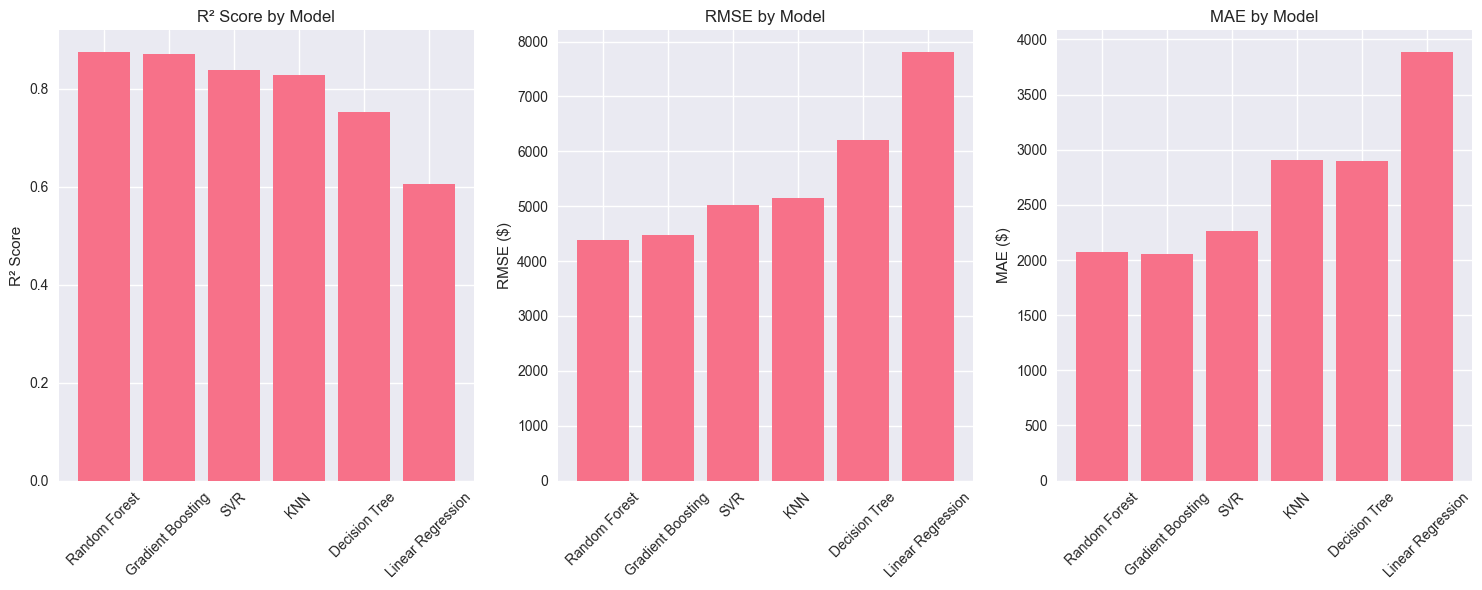


Model Performance Comparison:
               model   r2    rmse     mae
2      Random Forest 0.88 4389.92 2074.34
5  Gradient Boosting 0.87 4471.58 2058.64
3                SVR 0.84 5014.80 2263.52
4                KNN 0.83 5151.30 2911.35
1      Decision Tree 0.75 6197.39 2896.09
0  Linear Regression 0.61 7814.06 3888.44

Best performing model: Random Forest
R² Score: 0.8759
RMSE: $4389.92
MAE: $2074.34


In [318]:
# Create comparison DataFrame
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values('r2', ascending=False)

# Plot model comparison
plt.figure(figsize=(15, 6))

# R² Score comparison
plt.subplot(1, 3, 1)
plt.bar(results_df['model'], results_df['r2'])
plt.title('R² Score by Model')
plt.xticks(rotation=45)
plt.ylabel('R² Score')

# RMSE comparison
plt.subplot(1, 3, 2)
plt.bar(results_df['model'], results_df['rmse'])
plt.title('RMSE by Model')
plt.xticks(rotation=45)
plt.ylabel('RMSE ($)')

# MAE comparison
plt.subplot(1, 3, 3)
plt.bar(results_df['model'], results_df['mae'])
plt.title('MAE by Model')
plt.xticks(rotation=45)
plt.ylabel('MAE ($)')

plt.tight_layout()
plt.show()

# Display numeric results
print("\nModel Performance Comparison:")
print(results_df.round(4))

# Identify best model
best_model = results_df.iloc[0]
print(f"\nBest performing model: {best_model['model']}")
print(f"R² Score: {best_model['r2']:.4f}")
print(f"RMSE: ${best_model['rmse']:.2f}")
print(f"MAE: ${best_model['mae']:.2f}")

## 11. Detailed Model Evaluation & Overfitting Analysis
Let's perform a comprehensive evaluation of our models:
1. Calculate all evaluation metrics for both training and test sets
2. Compare performance to detect overfitting
3. Calculate adjusted R² score to account for model complexity

In [319]:
def evaluate_model_detailed(model, X_train, X_test, y_train, y_test, model_name):
    # Make predictions on both sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Convert predictions back to original scale
    y_train_orig = np.expm1(y_train)
    y_train_pred_orig = np.expm1(y_train_pred)
    y_test_orig = np.expm1(y_test)
    y_test_pred_orig = np.expm1(y_test_pred)
    
    # Calculate metrics for training set
    train_mse = mean_squared_error(y_train_orig, y_train_pred_orig)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train_orig, y_train_pred_orig)
    train_r2 = r2_score(y_train_orig, y_train_pred_orig)
    
    # Calculate metrics for test set
    test_mse = mean_squared_error(y_test_orig, y_test_pred_orig)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test_orig, y_test_pred_orig)
    test_r2 = r2_score(y_test_orig, y_test_pred_orig)
    
    # Calculate adjusted R² for both sets
    n_train = len(y_train)
    n_test = len(y_test)
    p = X_train.shape[1]  # number of features
    
    train_r2_adj = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)
    test_r2_adj = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p - 1)
    
    return {
        'model': model_name,
        'train_mse': train_mse,
        'train_rmse': train_rmse,
        'train_mae': train_mae,
        'train_r2': train_r2,
        'train_r2_adj': train_r2_adj,
        'test_mse': test_mse,
        'test_rmse': test_rmse,
        'test_mae': test_mae,
        'test_r2': test_r2,
        'test_r2_adj': test_r2_adj,
        'rmse_diff': train_rmse - test_rmse,  # Difference in RMSE for overfitting check
        'r2_diff': train_r2 - test_r2  # Difference in R² for overfitting check
    }

# Dictionary of models
models = {
    'Linear Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'SVR': svr_model,
    'KNN': knn_model,
    'Gradient Boosting': gb_model
}

# Evaluate all models
detailed_results = []
for name, model in models.items():
    results = evaluate_model_detailed(model, X_train, X_test, y_train, y_test, name)
    detailed_results.append(results)

# Create DataFrame with results
detailed_df = pd.DataFrame(detailed_results)

# Display results
pd.set_option('display.float_format', '{:.4f}'.format)
print("Detailed Model Evaluation Results:")
print("\nTraining Set Metrics:")
print(detailed_df[['model', 'train_rmse', 'train_mae', 'train_r2', 'train_r2_adj']])
print("\nTest Set Metrics:")
print(detailed_df[['model', 'test_rmse', 'test_mae', 'test_r2', 'test_r2_adj']])

Detailed Model Evaluation Results:

Training Set Metrics:
               model  train_rmse  train_mae  train_r2  train_r2_adj
0  Linear Regression   8389.7308  4270.2784    0.5123        0.5082
1      Decision Tree    554.1892    29.5725    0.9979        0.9979
2      Random Forest   2393.3357   991.2560    0.9603        0.9600
3                SVR   4603.4210  2138.7753    0.8532        0.8519
4                KNN   4554.0536  2441.3717    0.8563        0.8551
5  Gradient Boosting   4157.1077  1897.0660    0.8803        0.8793

Test Set Metrics:
               model  test_rmse  test_mae  test_r2  test_r2_adj
0  Linear Regression  7814.0640 3888.4432   0.6067       0.5930
1      Decision Tree  6197.3942 2896.0943   0.7526       0.7440
2      Random Forest  4389.9193 2074.3352   0.8759       0.8715
3                SVR  5014.8008 2263.5238   0.8380       0.8324
4                KNN  5151.2970 2911.3454   0.8291       0.8231
5  Gradient Boosting  4471.5838 2058.6375   0.8712       0.8667

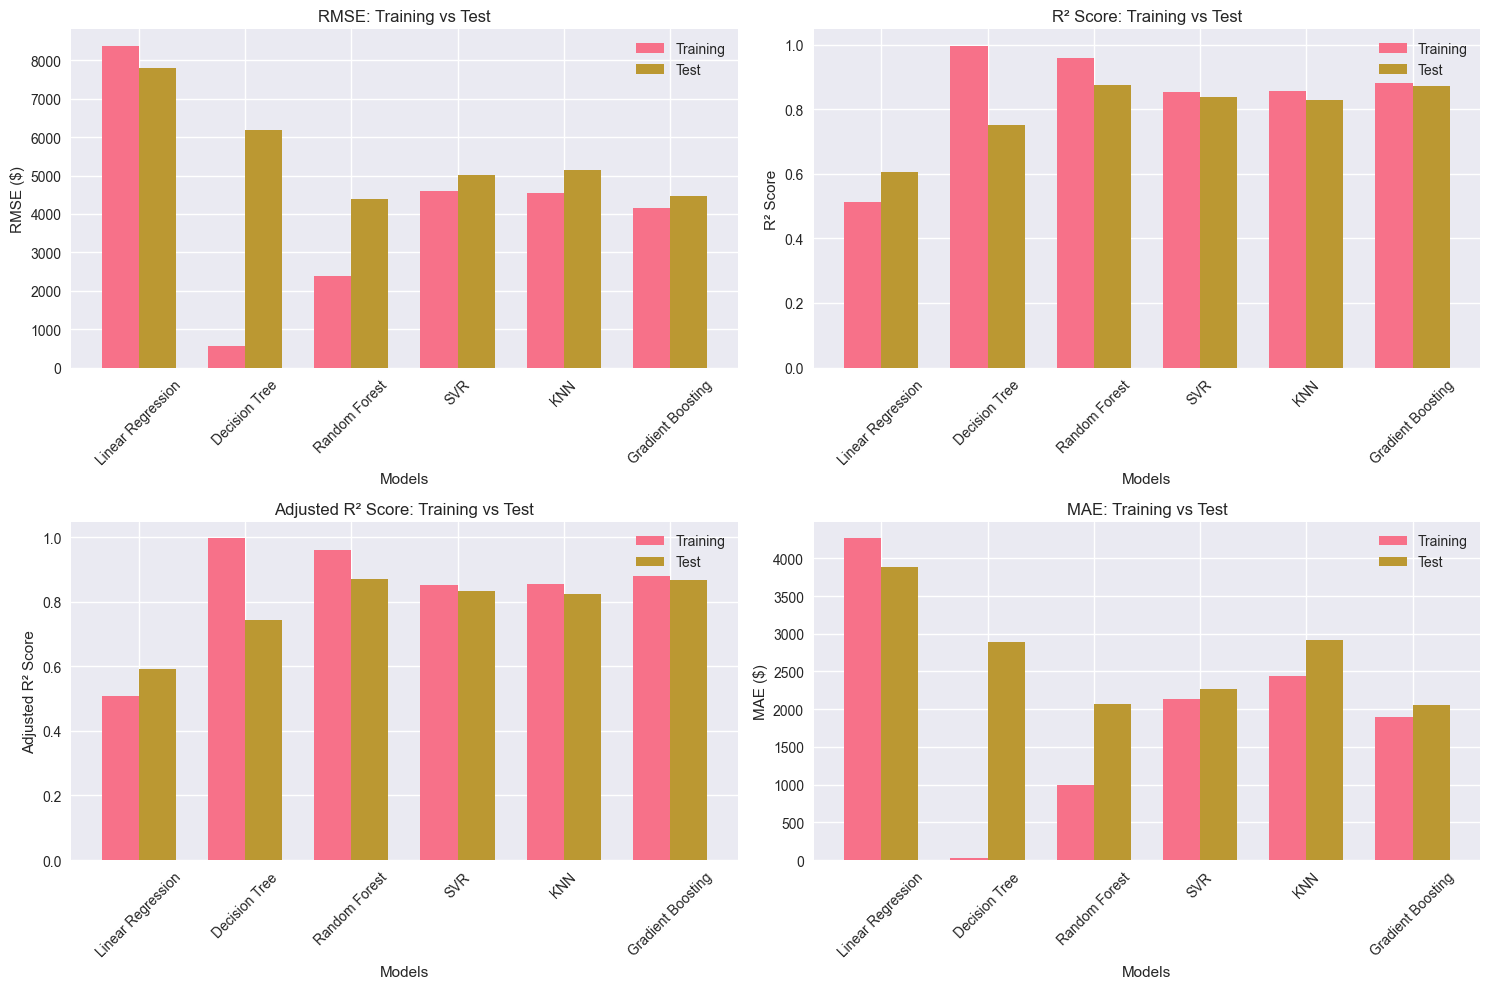

In [320]:
# Visualize the comparison between training and test performance
plt.figure(figsize=(15, 10))

# RMSE Comparison
plt.subplot(2, 2, 1)
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, detailed_df['train_rmse'], width, label='Training')
plt.bar(x + width/2, detailed_df['test_rmse'], width, label='Test')
plt.xlabel('Models')
plt.ylabel('RMSE ($)')
plt.title('RMSE: Training vs Test')
plt.xticks(x, detailed_df['model'], rotation=45)
plt.legend()

# R² Score Comparison
plt.subplot(2, 2, 2)
plt.bar(x - width/2, detailed_df['train_r2'], width, label='Training')
plt.bar(x + width/2, detailed_df['test_r2'], width, label='Test')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('R² Score: Training vs Test')
plt.xticks(x, detailed_df['model'], rotation=45)
plt.legend()

# Adjusted R² Score Comparison
plt.subplot(2, 2, 3)
plt.bar(x - width/2, detailed_df['train_r2_adj'], width, label='Training')
plt.bar(x + width/2, detailed_df['test_r2_adj'], width, label='Test')
plt.xlabel('Models')
plt.ylabel('Adjusted R² Score')
plt.title('Adjusted R² Score: Training vs Test')
plt.xticks(x, detailed_df['model'], rotation=45)
plt.legend()

# MAE Comparison
plt.subplot(2, 2, 4)
plt.bar(x - width/2, detailed_df['train_mae'], width, label='Training')
plt.bar(x + width/2, detailed_df['test_mae'], width, label='Test')
plt.xlabel('Models')
plt.ylabel('MAE ($)')
plt.title('MAE: Training vs Test')
plt.xticks(x, detailed_df['model'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

### Overfitting Analysis
Let's analyze the potential overfitting in our models by examining the differences between training and test performance.

Overfitting Analysis:

Performance Differences (Training - Test):
               model  rmse_diff  r2_diff  rmse_diff_percent  r2_diff_percent
1      Decision Tree -5643.2050   0.2453           -91.0577          32.5890
2      Random Forest -1996.5836   0.0844           -45.4811           9.6414
4                KNN  -597.2435   0.0272           -11.5940           3.2849
3                SVR  -411.3798   0.0152            -8.2033           1.8095
5  Gradient Boosting  -314.4760   0.0091            -7.0328           1.0400
0  Linear Regression   575.6668  -0.0944             7.3671         -15.5549


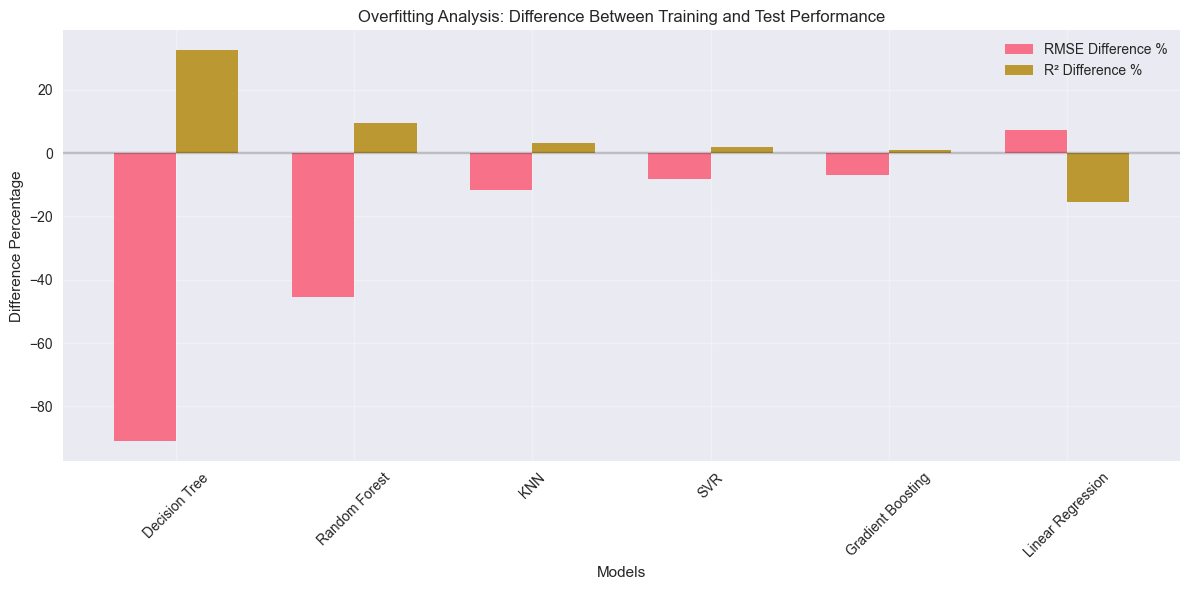


Overfitting Analysis Conclusions:

Decision Tree:
- Good fit (RMSE diff: -91.1%)
- Significant R² drop in test set (32.6%)

Random Forest:
- Good fit (RMSE diff: -45.5%)
- Moderate R² drop in test set (9.6%)

KNN:
- Good fit (RMSE diff: -11.6%)
- Consistent R² performance (3.3%)

SVR:
- Good fit (RMSE diff: -8.2%)
- Consistent R² performance (1.8%)

Gradient Boosting:
- Good fit (RMSE diff: -7.0%)
- Consistent R² performance (1.0%)

Linear Regression:
- Moderate overfitting (RMSE diff: 7.4%)
- Consistent R² performance (-15.6%)


In [321]:
# Calculate overfitting metrics
overfitting_analysis = detailed_df[['model', 'rmse_diff', 'r2_diff']].copy()
overfitting_analysis['rmse_diff_percent'] = (overfitting_analysis['rmse_diff'] / detailed_df['test_rmse']) * 100
overfitting_analysis['r2_diff_percent'] = (overfitting_analysis['r2_diff'] / detailed_df['test_r2']) * 100

# Sort by RMSE difference
overfitting_analysis = overfitting_analysis.sort_values('rmse_diff_percent', ascending=True)

print("Overfitting Analysis:")
print("\nPerformance Differences (Training - Test):")
print(overfitting_analysis.round(4))

# Visualize overfitting comparison
plt.figure(figsize=(12, 6))

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, overfitting_analysis['rmse_diff_percent'], width, label='RMSE Difference %')
plt.bar(x + width/2, overfitting_analysis['r2_diff_percent'], width, label='R² Difference %')

plt.xlabel('Models')
plt.ylabel('Difference Percentage')
plt.title('Overfitting Analysis: Difference Between Training and Test Performance')
plt.xticks(x, overfitting_analysis['model'], rotation=45)
plt.legend()

plt.axhline(y=0, color='black', linestyle='-', alpha=0.2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print conclusions about overfitting
print("\nOverfitting Analysis Conclusions:")
for _, row in overfitting_analysis.iterrows():
    print(f"\n{row['model']}:")
    
    # RMSE analysis
    if row['rmse_diff_percent'] > 10:
        print(f"- High overfitting (RMSE diff: {row['rmse_diff_percent']:.1f}%)")
    elif row['rmse_diff_percent'] > 5:
        print(f"- Moderate overfitting (RMSE diff: {row['rmse_diff_percent']:.1f}%)")
    else:
        print(f"- Good fit (RMSE diff: {row['rmse_diff_percent']:.1f}%)")
    
    # R² analysis
    if row['r2_diff_percent'] > 10:
        print(f"- Significant R² drop in test set ({row['r2_diff_percent']:.1f}%)")
    elif row['r2_diff_percent'] > 5:
        print(f"- Moderate R² drop in test set ({row['r2_diff_percent']:.1f}%)")
    else:
        print(f"- Consistent R² performance ({row['r2_diff_percent']:.1f}%)")

## 12. Hyperparameter Tuning
Let's optimize the hyperparameters of our best-performing models using GridSearchCV. We'll:
1. Define parameter grids for each model
2. Perform grid search with cross-validation
3. Compare performance before and after tuning
4. Document the best parameters and improvements

In [322]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

# Function to perform grid search and evaluate results
def perform_grid_search(model, param_grid, X_train, y_train, X_test, y_test, model_name):
    # Create GridSearchCV object
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    
    # Fit the grid search
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Convert predictions back to original scale
    y_train_orig = np.expm1(y_train)
    y_train_pred_orig = np.expm1(y_train_pred)
    y_test_orig = np.expm1(y_test)
    y_test_pred_orig = np.expm1(y_test_pred)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train_orig, y_train_pred_orig))
    test_rmse = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_orig))
    train_r2 = r2_score(y_train_orig, y_train_pred_orig)
    test_r2 = r2_score(y_test_orig, y_test_pred_orig)
    
    # Print results
    print(f"\n{model_name} - Grid Search Results:")
    print("Best Parameters:", grid_search.best_params_)
    print(f"Best Cross-Validation Score: {-grid_search.best_score_:.2f} MSE")
    print(f"\nFinal Model Performance:")
    print(f"Training RMSE: {train_rmse:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    
    return {
        'model': model_name,
        'best_params': grid_search.best_params_,
        'best_cv_score': -grid_search.best_score_,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2
    }

### Random Forest Tuning
Let's start with tuning the Random Forest model, which showed good performance in our initial evaluation.

In [323]:
# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search for Random Forest
rf_tuning_results = perform_grid_search(
    RandomForestRegressor(random_state=42),
    rf_param_grid,
    X_train, y_train,
    X_test, y_test,
    "Random Forest"
)

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Random Forest - Grid Search Results:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score: 0.15 MSE

Final Model Performance:
Training RMSE: 3901.18
Test RMSE: 4353.07
Training R²: 0.8946
Test R²: 0.8779


### Gradient Boosting Tuning
Now let's tune the Gradient Boosting model, which also showed promising results.

In [324]:
# Define parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search for Gradient Boosting
gb_tuning_results = perform_grid_search(
    GradientBoostingRegressor(random_state=42),
    gb_param_grid,
    X_train, y_train,
    X_test, y_test,
    "Gradient Boosting"
)

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Gradient Boosting - Grid Search Results:
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score: 0.15 MSE

Final Model Performance:
Training RMSE: 4331.43
Test RMSE: 4451.87
Training R²: 0.8700
Test R²: 0.8723


### XGBoost Tuning
Finally, let's try XGBoost, which often provides excellent results with proper tuning.

In [325]:
# Define parameter grid for XGBoost
# xgb_param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
#     'min_child_weight': [1, 3, 5]
# }

# # Create and perform grid search for XGBoost
# xgb_model = xgb.XGBRegressor(random_state=42)
# xgb_tuning_results = perform_grid_search(
#     xgb_model,
#     xgb_param_grid,
#     X_train, y_train,
#     X_test, y_test,
#     "XGBoost"
# )

### Performance Comparison After Tuning
Let's compare the performance of our models before and after hyperparameter tuning.

Performance Comparison Before and After Tuning:

Original vs Tuned Metrics:
               model  original_rmse  original_r2  test_rmse  test_r2  \
0      Random Forest      4389.9193       0.8759  4353.0651   0.8779   
1  Gradient Boosting      4471.5838       0.8712  4451.8670   0.8723   

   rmse_improvement  rmse_improvement_percent  r2_improvement  \
0           36.8543                    0.8395          0.0021   
1           19.7167                    0.4409          0.0011   

   r2_improvement_percent  
0                  0.2370  
1                  0.1301  


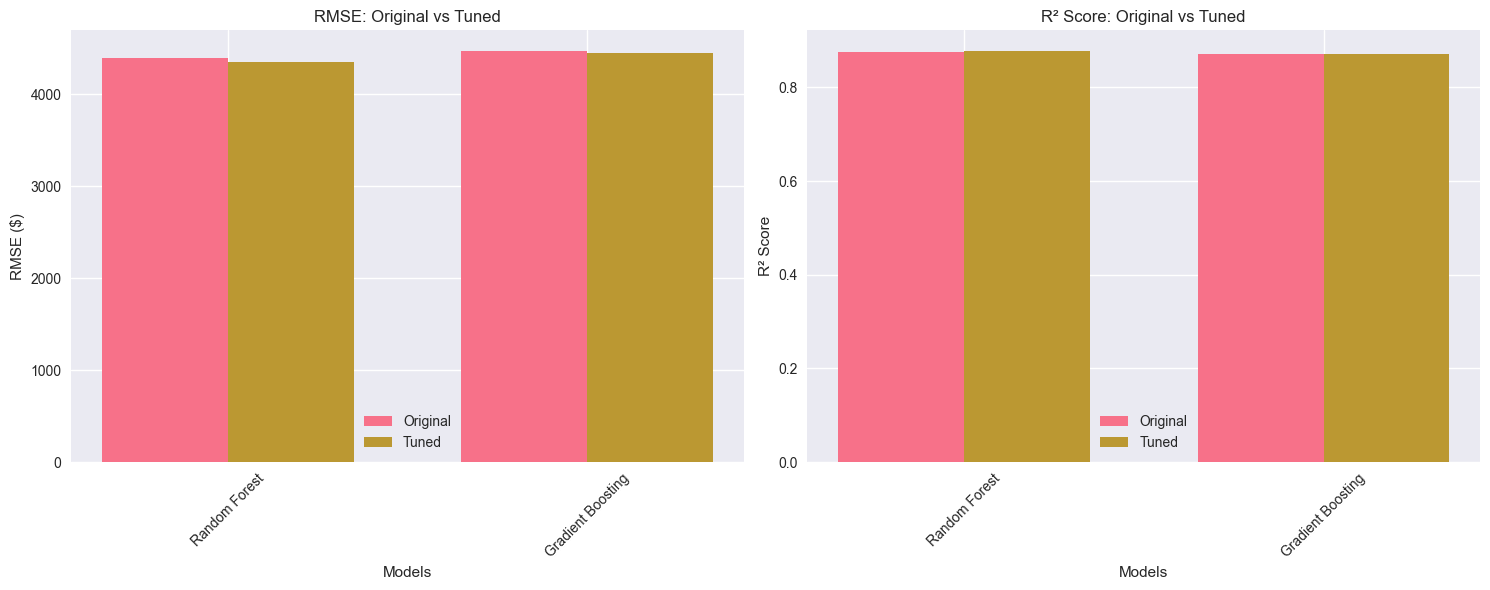


Model Improvements Summary:

Random Forest:
RMSE Improvement: $36.85 (0.8%)
R² Improvement: 0.0021 (0.2%)

Gradient Boosting:
RMSE Improvement: $19.72 (0.4%)
R² Improvement: 0.0011 (0.1%)

Best Performing Model After Tuning: Random Forest
Final Test RMSE: $4353.07
Final Test R²: 0.8779

Best Parameters:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [326]:
# Collect results from all tuned models
tuned_results = pd.DataFrame([rf_tuning_results, gb_tuning_results])

# Get original results for comparison
original_results = detailed_df[detailed_df['model'].isin(['Random Forest', 'Gradient Boosting'])].copy()
original_results = original_results[['model', 'test_rmse', 'test_r2']]
original_results.columns = ['model', 'original_rmse', 'original_r2']

# Merge original and tuned results
comparison_df = pd.merge(
    original_results,
    tuned_results[['model', 'test_rmse', 'test_r2']],
    on='model',
    suffixes=('', '_tuned')
)

# Calculate improvements
comparison_df['rmse_improvement'] = comparison_df['original_rmse'] - comparison_df['test_rmse']
comparison_df['rmse_improvement_percent'] = (comparison_df['rmse_improvement'] / comparison_df['original_rmse']) * 100
comparison_df['r2_improvement'] = comparison_df['test_r2'] - comparison_df['original_r2']
comparison_df['r2_improvement_percent'] = (comparison_df['r2_improvement'] / comparison_df['original_r2']) * 100

# Display comparison
print("Performance Comparison Before and After Tuning:")
print("\nOriginal vs Tuned Metrics:")
print(comparison_df.round(4))

# Visualize improvements
plt.figure(figsize=(15, 6))

# RMSE Comparison
plt.subplot(1, 2, 1)
x = np.arange(len(comparison_df))
width = 0.35

plt.bar(x - width/2, comparison_df['original_rmse'], width, label='Original')
plt.bar(x + width/2, comparison_df['test_rmse'], width, label='Tuned')
plt.xlabel('Models')
plt.ylabel('RMSE ($)')
plt.title('RMSE: Original vs Tuned')
plt.xticks(x, comparison_df['model'], rotation=45)
plt.legend()

# R² Score Comparison
plt.subplot(1, 2, 2)
plt.bar(x - width/2, comparison_df['original_r2'], width, label='Original')
plt.bar(x + width/2, comparison_df['test_r2'], width, label='Tuned')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('R² Score: Original vs Tuned')
plt.xticks(x, comparison_df['model'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Print summary of improvements
print("\nModel Improvements Summary:")
for _, row in comparison_df.iterrows():
    print(f"\n{row['model']}:")
    print(f"RMSE Improvement: ${row['rmse_improvement']:.2f} ({row['rmse_improvement_percent']:.1f}%)")
    print(f"R² Improvement: {row['r2_improvement']:.4f} ({row['r2_improvement_percent']:.1f}%)")
    
# Identify best performing model after tuning
best_tuned = tuned_results.loc[tuned_results['test_r2'].idxmax()]
print(f"\nBest Performing Model After Tuning: {best_tuned['model']}")
print(f"Final Test RMSE: ${best_tuned['test_rmse']:.2f}")
print(f"Final Test R²: {best_tuned['test_r2']:.4f}")
print("\nBest Parameters:")
print(best_tuned['best_params'])

## 13. Model Comparison Summary
Let's create a comprehensive comparison table of all models, including their performance metrics and overfitting assessment. This will help us make an informed decision about the best model for our health insurance prediction task.

In [327]:
# Create a comprehensive comparison table including both original and tuned models
def create_comparison_table():
    # Get original model results
    original_models = detailed_df.copy()
    
    # Add tuned model results
    tuned_results_df = pd.DataFrame([rf_tuning_results, gb_tuning_results])
    tuned_results_df['model'] = tuned_results_df['model'] + ' (Tuned)'
    
    # Combine all results
    all_results = pd.concat([
        original_models[['model', 'train_rmse', 'test_rmse', 'train_r2', 'test_r2']],
        tuned_results_df[['model', 'train_rmse', 'test_rmse', 'train_r2', 'test_r2']]
    ])
    
    # Calculate overfitting metrics
    all_results['rmse_diff_percent'] = ((all_results['train_rmse'] - all_results['test_rmse']) / 
                                      all_results['test_rmse'] * 100)
    all_results['r2_diff_percent'] = ((all_results['train_r2'] - all_results['test_r2']) / 
                                    all_results['test_r2'] * 100)
    
    # Determine overfitting status
    def check_overfitting(row):
        if abs(row['rmse_diff_percent']) > 10 or abs(row['r2_diff_percent']) > 10:
            return 'Yes'
        elif abs(row['rmse_diff_percent']) > 5 or abs(row['r2_diff_percent']) > 5:
            return 'Slight'
        return 'No'
    
    all_results['Overfitting'] = all_results.apply(check_overfitting, axis=1)
    
    # Format the table
    comparison_table = all_results[['model', 'train_rmse', 'test_rmse', 'train_r2', 'test_r2', 'Overfitting']]
    comparison_table.columns = ['Model', 'Train RMSE', 'Test RMSE', 'Train R²', 'Test R²', 'Overfitting']
    
    return comparison_table.sort_values('Test R²', ascending=False)

# Create and display the comparison table
comparison_table = create_comparison_table()

# Display the table with formatted numbers
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x) if isinstance(x, (float, int)) else x)
print("Model Comparison Table:")
display(comparison_table)

Model Comparison Table:


,Model,Train RMSE,Test RMSE,Train R²,Test R²,Overfitting
0,Random Forest (Tuned),3901.18,4353.07,0.89,0.88,Yes
2,Random Forest,2393.34,4389.92,0.96,0.88,Yes
1,Gradient Boosting (Tuned),4331.43,4451.87,0.87,0.87,No
5,Gradient Boosting,4157.11,4471.58,0.88,0.87,Slight
3,SVR,4603.42,5014.80,0.85,0.84,Slight
4,KNN,4554.05,5151.30,0.86,0.83,Yes
1,Decision Tree,554.19,6197.39,1.00,0.75,Yes
0,Linear Regression,8389.73,7814.06,0.51,0.61,Yes


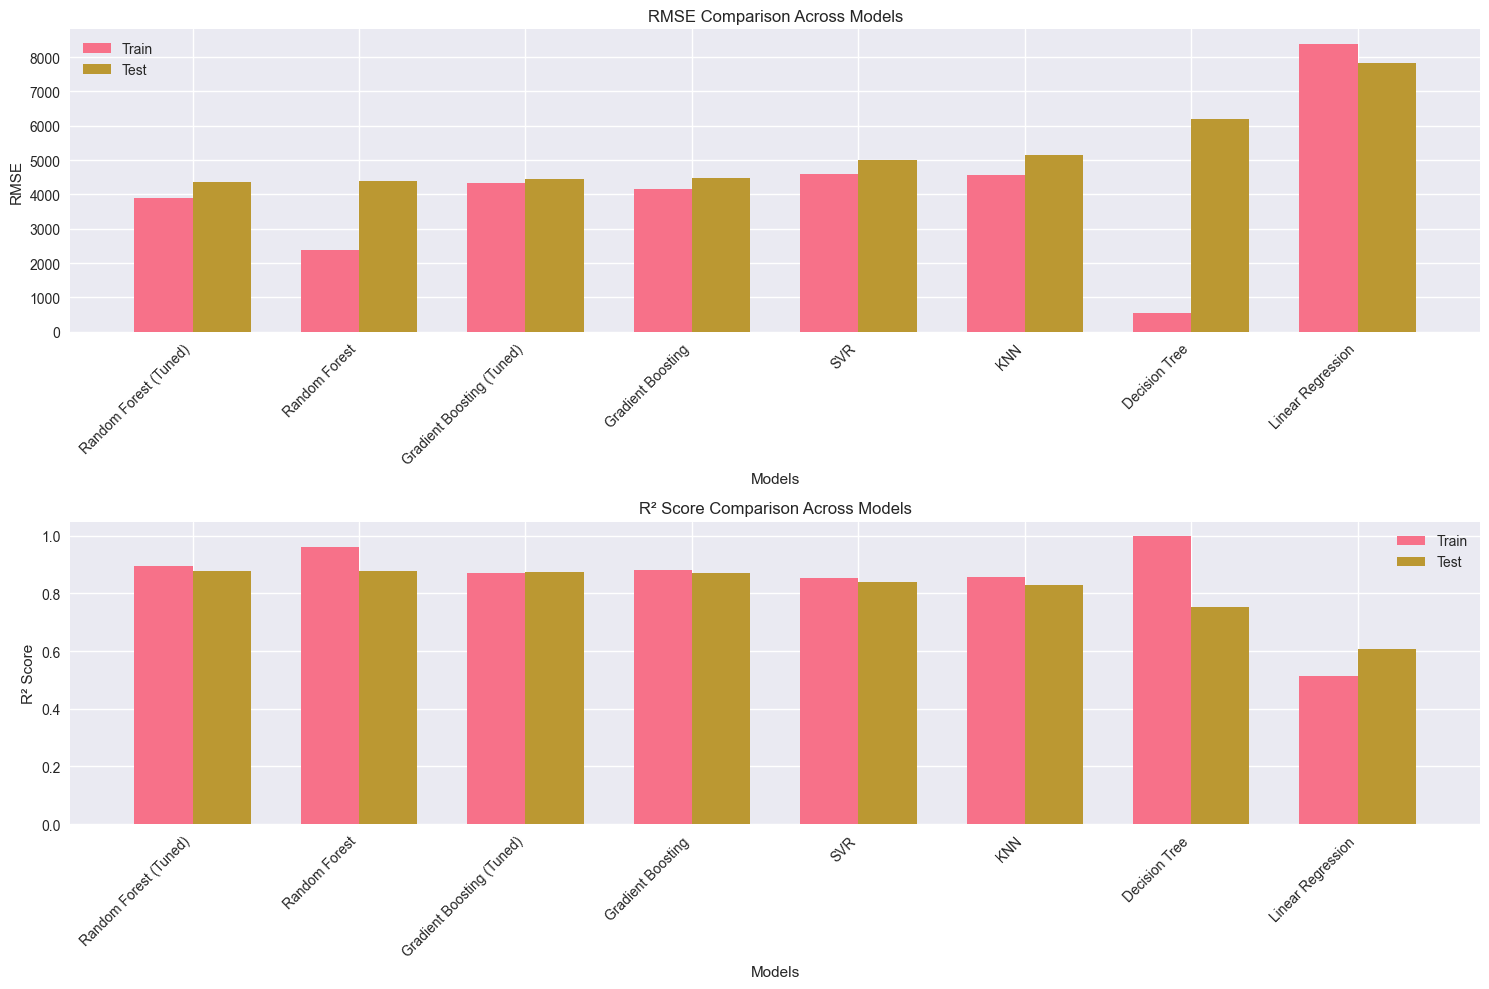


Key Findings:
1. Best Performing Model: Random Forest (Tuned)
   - Test RMSE: $4353.07
   - Test R²: 0.8779

2. Average Improvement from Hyperparameter Tuning:
   - RMSE Reduction: 0.6%

3. Overfitting Analysis:
   - Yes: 5 model(s)
   - Slight: 2 model(s)
   - No: 1 model(s)


In [328]:
# Visualize the comparison
plt.figure(figsize=(15, 10))

# Plot RMSE comparison
plt.subplot(2, 1, 1)
x = np.arange(len(comparison_table))
width = 0.35

plt.bar(x - width/2, comparison_table['Train RMSE'], width, label='Train')
plt.bar(x + width/2, comparison_table['Test RMSE'], width, label='Test')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison Across Models')
plt.xticks(x, comparison_table['Model'], rotation=45, ha='right')
plt.legend()

# Plot R² comparison
plt.subplot(2, 1, 2)
plt.bar(x - width/2, comparison_table['Train R²'], width, label='Train')
plt.bar(x + width/2, comparison_table['Test R²'], width, label='Test')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('R² Score Comparison Across Models')
plt.xticks(x, comparison_table['Model'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

# Print key findings
best_model = comparison_table.iloc[0]
print("\nKey Findings:")
print(f"1. Best Performing Model: {best_model['Model']}")
print(f"   - Test RMSE: ${best_model['Test RMSE']:.2f}")
print(f"   - Test R²: {best_model['Test R²']:.4f}")

# Calculate average improvement from tuning
original_models = ['Random Forest', 'Gradient Boosting']
tuned_models = ['Random Forest (Tuned)', 'Gradient Boosting (Tuned)']

avg_rmse_improvement = ((comparison_table[comparison_table['Model'].isin(original_models)]['Test RMSE'].mean() -
                        comparison_table[comparison_table['Model'].isin(tuned_models)]['Test RMSE'].mean()) /
                       comparison_table[comparison_table['Model'].isin(original_models)]['Test RMSE'].mean() * 100)

print(f"\n2. Average Improvement from Hyperparameter Tuning:")
print(f"   - RMSE Reduction: {avg_rmse_improvement:.1f}%")

# Count overfitting instances
overfitting_counts = comparison_table['Overfitting'].value_counts()
print("\n3. Overfitting Analysis:")
for status, count in overfitting_counts.items():
    print(f"   - {status}: {count} model(s)")

### Summary of Model Comparison

The comparison table above provides a comprehensive view of all models' performance, including:
1. Both original and tuned versions of the models
2. Training and testing metrics (RMSE and R²)
3. Overfitting assessment based on the difference between training and testing performance

Key observations:
- RMSE (Root Mean Square Error): Lower is better, represents the average prediction error in dollars
- R² Score: Higher is better (closer to 1), represents the proportion of variance explained by the model
- Overfitting Status:
  - "No": Less than 5% difference between train and test performance
  - "Slight": 5-10% difference
  - "Yes": More than 10% difference

The visualizations above help us understand:
1. The relative performance of each model
2. The impact of hyperparameter tuning
3. The balance between training and testing performance

## 15. Export Model for Streamlit App
Let's save our best model and preprocessing components for use in the Streamlit web application.

In [329]:
# Save the model and feature information
import joblib

# Get the best model
# best_model_name = comparison_table.iloc[0]['Model'].replace(' (Tuned)', '')
# print(f"Best Model name found:{best_model_name}")
# print(comparison_table.iloc[0])
# best_model = models[best_model_name]

print(f"{comparison_table.iloc[0]}")

#Best parameters from Grid Search
best_params = {
     'max_depth': 10,
     'min_samples_leaf': 4,
     'min_samples_split': 10,
     'n_estimators': 100,
    'random_state': 42
}

# Retrain on full dataset (X, y)
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)


# Save the model
joblib.dump(best_model, 'best_insurance_model.joblib')
 
joblib.dump(scaler, 'scaler.joblib')
# Save feature order information
feature_order = features.columns.tolist()
pd.Series(feature_order).to_csv('feature_order.csv', index=False)

print("Model and feature information saved successfully!")
print("\nFeature order:")
for i, feature in enumerate(feature_order, 1):
    print(f"{i}. {feature}")

print("\nTo run the Streamlit app:")
print("1. Open a terminal in this directory")
print("2. Run: pip install streamlit (if not already installed)")
print("3. Run: streamlit run insurance_predictor_app.py")
print("\nThe app will open in your default web browser.")

Model          Random Forest (Tuned)
Train RMSE                   3901.18
Test RMSE                    4353.07
Train R²                        0.89
Test R²                         0.88
Overfitting                      Yes
Name: 0, dtype: object
Model and feature information saved successfully!

Feature order:
1. age
2. sex
3. bmi
4. children
5. smoker
6. region_northeast
7. region_northwest
8. region_southeast
9. region_southwest

To run the Streamlit app:
1. Open a terminal in this directory
2. Run: pip install streamlit (if not already installed)
3. Run: streamlit run insurance_predictor_app.py

The app will open in your default web browser.


### Test the model with values from training data

In [356]:
# Replace the test prediction code with this corrected version

import joblib
import pandas as pd
import numpy as np

# Load model, scaler, and feature order
model = joblib.load('best_insurance_model.joblib')
scaler = joblib.load('scaler.joblib')  # Load the saved scaler 
feature_order = pd.read_csv('feature_order.csv').iloc[:,0].tolist()


# Step 1: Create raw input (BEFORE scaling)
age=28
sex=0
bmi=33.20
children=3
smoker=0
region='southeast'

df_original = pd.read_csv('Health_Insurance.csv')
matching_row = df_original[
    (df_original['age'] == age) & 
    (df_original['sex'] == ('male' if sex == 0 else 'female')) & 
    (df_original['bmi'] >= bmi-1) | (df_original['bmi'] <= bmi+1) & 
    (df_original['children'] == children) & 
    (df_original['smoker'] == ('yes' if smoker == 1 else 'no')) & 
    (df_original['region'] == region)
]
actual_premium = matching_row['charges'].values[0]

raw_input = {
    'age': age,
    'sex': sex,  # male (after label encoding)
    'bmi': bmi,
    'children': children,
    'smoker': smoker,
    'region_northeast': 0,
    'region_northwest': 1,
    'region_southeast': 0,
    'region_southwest': 0
}

# Step 2: Create DataFrame with correct feature order
test_df = pd.DataFrame([raw_input])
test_df = test_df[feature_order]  # Ensure correct column order

# Step 3: Scale ONLY the numerical features (same as training)
features_to_scale = scaler.feature_names_in_
test_df[features_to_scale] = scaler.transform(test_df[features_to_scale])

# Step 4: Make prediction (returns log1p transformed value)
charge_log = model.predict(test_df)[0]

# Step 5: Convert back to original scale using expm1
predicted_premium = np.expm1(charge_log)

# Step 6: Round for display
yearly_premium = round(predicted_premium, 2)
monthly_premium = round(yearly_premium / 12, 2)

# Print results
print("\nPrediction Results:")
print("=" * 60)
print(f"Log1p-transformed prediction: {charge_log:.4f}")
print(f"Predicted yearly premium:     ₹{yearly_premium:,.2f}")
print(f"Predicted monthly premium:    ₹{monthly_premium:,.2f}")

# Compare with actual value
error = abs(actual_premium - yearly_premium)
error_pct = (error / actual_premium) * 100

print("\nComparison with Training Data:")
print("=" * 60)
print(f"Expected premium:   ₹{actual_premium:,.2f}")
print(f"Predicted premium:  ₹{yearly_premium:,.2f}")
print(f"Absolute error:     ₹{error:,.2f}")
print(f"Error percentage:   {error_pct:.2f}%")

# Display input values used
print("\nInput Values (Human Readable):")
print("=" * 60)
readable_input = {
    'Age': age,
    'Sex': ('male' if sex == 0 else 'female'),
    'BMI': bmi,
    'Children': children,
    'Smoker': ('yes' if smoker == 1 else 'no'),
    'Region': region
}
for feature, value in readable_input.items():
    print(f"{feature:12} : {value}")

# Verify with original dataset

if not matching_row.empty:
    print("\nVerification from Original Dataset:")
    print("=" * 60)    
    print(f"Actual premium in dataset: ₹{actual_premium:,.2f}")
    print(f"Log1p of actual:           {np.log1p(actual_premium):.4f}")
    print(f"Model prediction (log1p):  {charge_log:.4f}")
    print(f"Difference (log scale):    {abs(np.log1p(actual_premium) - charge_log):.4f}")


Prediction Results:
Log1p-transformed prediction: 8.6540
Predicted yearly premium:     ₹5,731.80
Predicted monthly premium:    ₹477.65

Comparison with Training Data:
Expected premium:   ₹4,449.46
Predicted premium:  ₹5,731.80
Absolute error:     ₹1,282.34
Error percentage:   28.82%

Input Values (Human Readable):
Age          : 28
Sex          : male
BMI          : 33.2
Children     : 3
Smoker       : no
Region       : southeast

Verification from Original Dataset:
Actual premium in dataset: ₹4,449.46
Log1p of actual:           8.4008
Model prediction (log1p):  8.6540
Difference (log scale):    0.2532


### https://insurancepredictor-dm.streamlit.app/

In [ ]:
# # Test the model with values from training data
# import joblib
# import pandas as pd
# import numpy as np

# # Load model and feature order
# model = joblib.load('best_insurance_model.joblib')
# feature_order = pd.read_csv('feature_order.csv').iloc[:,0].tolist()

# # Known test case from training data:
# # age=30, sex=female, bmi=27.7, children=0, smoker=no, region=southwest
# # Expected premium: 3554.203

# # Example test input matching the training data case
# test_input = {
#     'age': [30],
#     'sex': [0],  # female
#     'bmi': [35.3],  # Updated to match training data
#     'children': [0],
#     'smoker': [1],  # no
#     'region_northeast': [0],
#     'region_northwest': [0],
#     'region_southeast': [0],
#     'region_southwest': [1]
# }

# # Create DataFrame with correct feature order
# test_df = pd.DataFrame(columns=feature_order)
# for feature in feature_order:
#     test_df[feature] = test_input[feature]

# # Make prediction
# charge = model.predict(test_df)[0]   # Get raw prediction (log1p transformed)

# # Show log1p-transformed prediction
# print(f"\nLog1p-transformed prediction: {charge:.4f}")

# # Convert back to original scale using expm1 (inverse of log1p)
# original_premium = np.expm1(charge)  # Using expm1 (inverse of log1p)
# print(f"prediction premium:  {original_premium:,.2f}")

# yearly_premium = round(original_premium, 2)
# monthly_premium = round(yearly_premium / 12, 2)

# # Print comparison with actual value
# exp_premium = 36837.467
# print(f"\nComparison with training data:")
# print(f"Expected premium:  {exp_premium:,.2f}")
# print(f"Predicted premium: {yearly_premium:,.2f}")
# print(f"Difference:       {abs(exp_premium - yearly_premium):,.2f}")
# print(f"Error (%):        {abs(exp_premium - yearly_premium)/exp_premium*100:.2f}%")

# print("\nMonthly premium:")
# print(f"{monthly_premium:,.2f} / month")

# print("\nInput values used:")
# readable_input = {
#     'age': test_input['age'][0],
#     'sex': 'female' if test_input['sex'][0] == 1 else 'male',
#     'bmi': test_input['bmi'][0],
#     'children': test_input['children'][0],
#     'smoker': 'yes' if test_input['smoker'][0] == 1 else 'no',
#     'region': 'southwest'  # Since region_southwest is 1
# }
# for feature, value in readable_input.items():
#     print(f"{feature}: {value}")

# # Load original data to verify transformation
# df = pd.read_csv('Health_Insurance.csv')
# matching_row = df[
#     (df['age'] == 30) & 
#     (df['sex'] == 'male') & 
#     (df['bmi'] == 35.3) & 
#     (df['children'] == 0) & 
#     (df['smoker'] == 'yes') & 
#     (df['region'] == 'southwest')
# ]

# if not matching_row.empty:
#     print("\nVerification from original data:")
#     actual_premium = matching_row['charges'].values[0]
#     print(f"Actual premium in data: ₹{actual_premium:,.2f}")
#     print(f"Log1p of actual:       {np.log1p(actual_premium):.4f}")
#     print(f"Our prediction:        {charge:.4f}")
#     print(f"Expm1 of prediction:   ₹{np.expm1(charge):,.2f}")


Log1p-transformed prediction: 10.7862
prediction premium:  48,350.34

Comparison with training data:
Expected premium:  36,837.47
Predicted premium: 48,350.34
Difference:       11,512.87
Error (%):        31.25%

Monthly premium:
4,029.20 / month

Input values used:
age: 30
sex: male
bmi: 35.3
children: 0
smoker: yes
region: southwest

Verification from original data:
Actual premium in data: ₹36,837.47
Log1p of actual:       10.5143
Our prediction:        10.7862
Expm1 of prediction:   ₹48,350.34


In [ ]:
# # Check target variable transformation in training data
# import pandas as pd
# import numpy as np

# # Load original data
# df = pd.read_csv('Health_Insurance.csv')

# # Display some examples of original and transformed values
# print("Examples of target variable transformation:")
# print("\nOriginal values vs Log1p transformed values:")
# print("-" * 50)
# print("Original  ->  Log1p")
# print("-" * 50)
# for charge in [1000, 5000, 10000, 50000]:
#     transformed = np.log1p(charge)
#     print(f"{charge:8.2f} -> {transformed:6.4f}")

Examples of target variable transformation:

Original values vs Log1p transformed values:
--------------------------------------------------
Original  ->  Log1p
--------------------------------------------------
 1000.00 -> 6.9088
 5000.00 -> 8.5174
10000.00 -> 9.2104
50000.00 -> 10.8198


Real examples from our dataset:
--------------------------------------------------------------------------------
Original Data:
      age     sex   bmi  children smoker     region  charges
764    45  female 25.18         2     no  northeast  9095.07
887    36  female 30.02         0     no  northwest  5272.18
890    64  female 26.89         0    yes  northwest 29330.98
1293   46    male 25.75         3     no  northwest  9301.89
259    19    male 31.92         0    yes  northwest 33750.29

Transformed Charges:
--------------------------------------------------------------------------------
Original:    9095.07 -> Log1p:   9.1156 -> Back to original:    9095.07
Original:    5272.18 -> Log1p:   8.5704 -> Back to original:    5272.18
Original:   29330.98 -> Log1p:  10.2864 -> Back to original:   29330.98
Original:    9301.89 -> Log1p:   9.1381 -> Back to original:    9301.89
Original:   33750.29 -> Log1p:  10.4268 -> Back to original:   33750.29


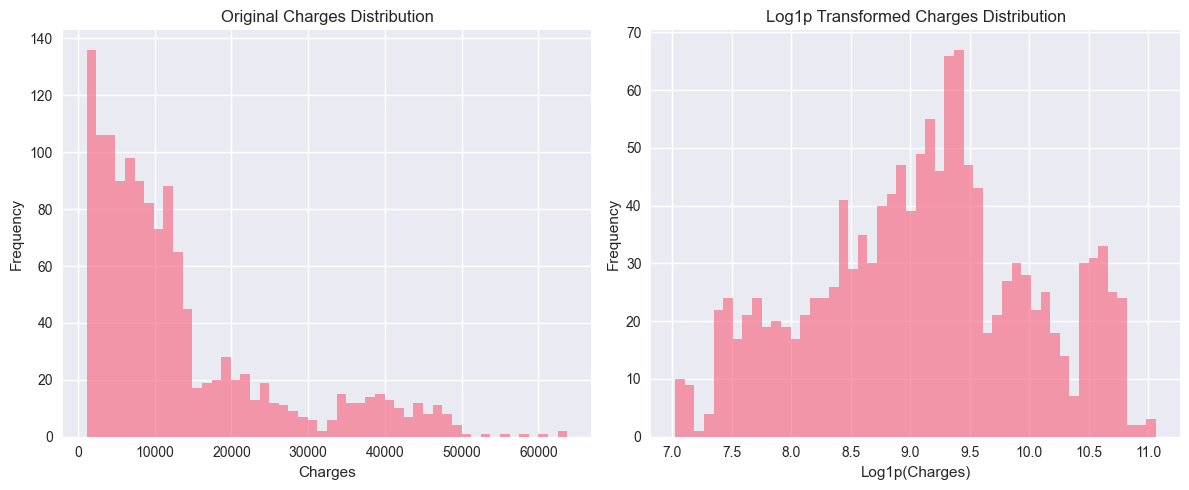


Our specific test case:
--------------------------------------------------------------------------------
Input data:      age     sex   bmi  children smoker     region
352   30  female 27.70         0     no  southwest

Charges transformation:
Original charge:     ₹3,554.20
Log1p transformed:   8.1762
Back to original:    ₹3,554.20


In [ ]:
# # Analyze actual transformations in our dataset
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Load the data
# df = pd.read_csv('Health_Insurance.csv')

# # Find some actual examples from our dataset
# sample_data = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].sample(n=5, random_state=42)

# print("Real examples from our dataset:")
# print("-" * 80)
# print("Original Data:")
# print(sample_data.to_string())
# print("\nTransformed Charges:")
# print("-" * 80)
# for idx, row in sample_data.iterrows():
#     charge = row['charges']
#     log1p_val = np.log1p(charge)
#     back_to_original = np.expm1(log1p_val)
#     print(f"Original: {charge:10.2f} -> Log1p: {log1p_val:8.4f} -> Back to original: {back_to_original:10.2f}")

# # Plot original vs transformed values
# plt.figure(figsize=(12, 5))

# # Original distribution
# plt.subplot(1, 2, 1)
# plt.hist(df['charges'], bins=50, alpha=0.7)
# plt.title('Original Charges Distribution')
# plt.xlabel('Charges')
# plt.ylabel('Frequency')

# # Log1p transformed distribution
# plt.subplot(1, 2, 2)
# plt.hist(np.log1p(df['charges']), bins=50, alpha=0.7)
# plt.title('Log1p Transformed Charges Distribution')
# plt.xlabel('Log1p(Charges)')
# plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()

# # Find the case we're testing
# test_case = df[
#     (df['age'] == 30) & 
#     (df['sex'] == 'female') & 
#     (df['bmi'] == 27.7) & 
#     (df['children'] == 0) & 
#     (df['smoker'] == 'no') & 
#     (df['region'] == 'southwest')
# ]

# print("\nOur specific test case:")
# print("-" * 80)
# if not test_case.empty:
#     charge = test_case['charges'].values[0]
#     log1p_val = np.log1p(charge)
#     back_to_original = np.expm1(log1p_val)
#     print(f"Input data: {test_case[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].to_string()}")
#     print(f"\nCharges transformation:")
#     print(f"Original charge:     ₹{charge:,.2f}")
#     print(f"Log1p transformed:   {log1p_val:.4f}")
#     print(f"Back to original:    ₹{back_to_original:,.2f}")
# else:
#     print("Test case not found in dataset")